# IMPORT

In [50]:
import pandas as pd

In [51]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np
import pickle
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, LSTM, Dense, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [52]:
# 한글폰트 사용 in colab
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


In [53]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 데이터 감마 쪼개기

In [5]:
# up_2017=df.loc['2017-01-31' : '2018-02-28'] # 17.01.31 매수 (상승장) 3.1 ~ 3.30 
# up_2019=df.loc['2019-03-31' : '2019-06-30'] 
# up_2020=df.loc['2019-10-31' : '2020-01-31'] 
# up_2021=df.loc['2020-06-30' : '2021-08-31'] 
# down_2018=df.loc['2018-03-31':'2019-02-28'] # 18.03.31 매수 (하락장)
# down_2019=df.loc['2019-07-31':'2019-09-30'] 
# down_2020=df.loc['2020-02-29':'2020-04-30']
# down_2021=df.loc['2021-09-30':'2022-05-01']

In [6]:
# up_2017=df.loc['2017-01-31' : '2018-03-30']    184

# down_2018=df.loc['2018-03-31':'2019-03-30']

# up_2019=df.loc['2019-03-31' : '2019-07-30']   529

# down_2019=df.loc['2019-07-31':'2019-10-30']

# up_2020=df.loc['2019-10-31' : '2020-02-28']   680

# down_2020=df.loc['2020-02-29':'2020-06-29']

# up_2021=df.loc['2020-06-30' : '2021-09-29']     1091

# down_2021=df.loc['2021-09-30':'2022-05-01']

In [21]:
# 상승1 = pd.read_excel('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/상승/상승1.xlsx')
# 상승2 = pd.read_excel('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/상승/상승2.xlsx')
# 상승3 = pd.read_excel('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/상승/상승3.xlsx')
# 상승4 = pd.read_excel('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/상승/상승4.xlsx')
# 상승5 = pd.read_excel('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/상승/상승5.xlsx')

In [9]:
상승5

,Unnamed: 0,단기채로그,중기채로그,ksp로그,iau로그,dbc로그,vnq로그,nsd로그
0,2017-07-17,0.066300,0.055532,0.216946,0.096101,0.064712,0.144327,0.356082
1,2017-07-18,0.066300,0.055532,0.216946,0.096101,0.064712,0.144327,0.356082
2,2017-07-19,0.066300,0.055532,0.216946,0.096101,0.064712,0.144327,0.356082
3,2017-07-20,0.066300,0.055532,0.216946,0.096101,0.064712,0.144327,0.356082
4,2017-07-21,0.066300,0.055532,0.216946,0.096101,0.064712,0.144327,0.356082
...,...,...,...,...,...,...,...,...
1244,2022-05-04,0.078750,0.055198,0.225553,0.086237,0.070323,0.136461,0.347477
1245,2022-05-05,0.066140,0.056465,0.229299,0.084896,0.068039,0.145486,0.349674
1246,2022-05-06,0.078596,0.054038,0.217004,0.094167,0.066593,0.136791,0.352812
1247,2022-05-09,0.072517,0.053022,0.239175,0.074488,0.070363,0.146922,0.343513


In [10]:
# 하락1 = pd.read_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/하락/하락1.csv',encoding='cp949')
# 하락2 = pd.read_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/하락/하락2.csv',encoding='cp949')
# 하락3 = pd.read_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/하락/하락3.csv',encoding='cp949')
# 하락4 = pd.read_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/하락/하락4.csv',encoding='cp949')
# 하락5 = pd.read_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/하락/하락5.csv',encoding='cp949')

In [11]:
하락1

,Unnamed: 0,?④린梨꾨줈洹?以묎린梨꾨줈洹?ksp濡쒓렇,iau濡쒓렇,dbc濡쒓렇,vnq濡쒓렇,nsd濡쒓렇,Unnamed: 6,Unnamed: 7
0,2017-07-17,0.253832,0.273474,0.080595,0.192495,0.071100,0.071163,0.057341
1,2017-07-18,0.257111,0.266941,0.087713,0.188576,0.070442,0.071541,0.057675
2,2017-07-19,0.255257,0.271835,0.093653,0.179202,0.071087,0.071073,0.057893
3,2017-07-20,0.258151,0.272455,0.089954,0.178760,0.071945,0.071230,0.057505
4,2017-07-21,0.255870,0.269762,0.083801,0.197476,0.067928,0.070080,0.055084
...,...,...,...,...,...,...,...,...
1244,2022-05-04,0.263184,0.232529,0.083117,0.200043,0.075750,0.083540,0.061838
1245,2022-05-05,0.263184,0.232529,0.083117,0.200043,0.075750,0.083540,0.061838
1246,2022-05-06,0.263184,0.232529,0.083117,0.200043,0.075750,0.083540,0.061838
1247,2022-05-09,0.263184,0.232529,0.083117,0.200043,0.075750,0.083540,0.061838


In [79]:
상승1.index= 상승1['Unnamed: 0.1']
상승2.index= 상승2['Unnamed: 0.1']
상승3.index= 상승3['Unnamed: 0.1']
상승4.index= 상승4['Unnamed: 0.1']
상승5.index= 상승5['Unnamed: 0.1']

In [13]:
상승3.columns.tolist()

['Unnamed: 0', '단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그']

In [80]:
하락1.index= 하락1['Unnamed: 0.1']
하락2.index= 하락2['Unnamed: 0.1']
하락3.index= 하락3['Unnamed: 0.1']
하락4.index= 하락4['Unnamed: 0.1']
하락5.index= 하락5['Unnamed: 0.1']

In [15]:
# 하락1.columns = ['Unnamed: 0', '단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그']
# 하락2.columns = ['Unnamed: 0', '단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그']
# 하락3.columns = ['Unnamed: 0', '단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그']
# 하락4.columns = ['Unnamed: 0', '단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그']
# 하락5.columns = ['Unnamed: 0', '단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그']

In [22]:
# 상승1.to_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/상승/상승오리지널/상승1.csv')
# 상승2.to_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/상승/상승오리지널/상승2.csv')
# 상승3.to_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/상승/상승오리지널/상승3.csv')
# 상승4.to_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/상승/상승오리지널/상승4.csv')
# 상승5.to_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/상승/상승오리지널/상승5.csv')
# # 하락1.to_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/상승/상승오리지널/하락1.csv')
# # 하락2.to_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/상승/상승오리지널/하락2.csv')
# # 하락3.to_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/상승/상승오리지널/하락3.csv')
# # 하락4.to_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/상승/상승오리지널/하락4.csv')
# # 하락5.to_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/상승/상승오리지널/하락5.csv')

In [72]:
상승1 =pd.read_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/상승/상승오리지널/상승1.csv')
상승2 =pd.read_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/상승/상승오리지널/상승2.csv')
상승3 =pd.read_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/상승/상승오리지널/상승3.csv')
상승4 =pd.read_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/상승/상승오리지널/상승4.csv')
상승5 =pd.read_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/상승/상승오리지널/상승5.csv')
하락1 =pd.read_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/상승/상승오리지널/하락1.csv')
하락2 =pd.read_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/상승/상승오리지널/하락2.csv')
하락3 =pd.read_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/상승/상승오리지널/하락3.csv')
하락4 =pd.read_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/상승/상승오리지널/하락4.csv')
하락5 =pd.read_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/상승/상승오리지널/하락5.csv')

In [81]:
하락4

,Unnamed: 0.1,단기채로그,중기채로그,ksp로그,iau로그,dbc로그,vnq로그,nsd로그
Unnamed: 0.1,,,,,,,,
2017-07-17,2017-07-17,0.151876,0.222745,0.076394,0.278377,0.078003,0.091316,0.101288
2017-07-18,2017-07-18,0.151876,0.222745,0.076394,0.278377,0.078003,0.091316,0.101288
2017-07-19,2017-07-19,0.151876,0.222745,0.076394,0.278377,0.078003,0.091316,0.101288
2017-07-20,2017-07-20,0.151876,0.222745,0.076394,0.278377,0.078003,0.091316,0.101288
2017-07-21,2017-07-21,0.151876,0.222745,0.076394,0.278377,0.078003,0.091316,0.101288
...,...,...,...,...,...,...,...,...
2022-05-04,2022-05-04,0.216019,0.178287,0.081170,0.207821,0.087656,0.105680,0.123367
2022-05-05,2022-05-05,0.216019,0.178287,0.081170,0.207821,0.087656,0.105680,0.123367
2022-05-06,2022-05-06,0.216019,0.178287,0.081170,0.207821,0.087656,0.105680,0.123367


In [82]:
상승1

,Unnamed: 0.1,단기채로그,중기채로그,ksp로그,iau로그,dbc로그,vnq로그,nsd로그
Unnamed: 0.1,,,,,,,,
2017-07-17,2017-07-17,0.343385,0.312667,0.111111,0.057498,0.068967,0.053228,0.053144
2017-07-18,2017-07-18,0.343385,0.312667,0.111111,0.057498,0.068967,0.053228,0.053144
2017-07-19,2017-07-19,0.343385,0.312667,0.111111,0.057498,0.068967,0.053228,0.053144
2017-07-20,2017-07-20,0.343385,0.312667,0.111111,0.057498,0.068967,0.053228,0.053144
2017-07-21,2017-07-21,0.343385,0.312667,0.111111,0.057498,0.068967,0.053228,0.053144
...,...,...,...,...,...,...,...,...
2022-05-04,2022-05-04,0.341134,0.308546,0.114146,0.059134,0.069635,0.053625,0.053780
2022-05-05,2022-05-05,0.341921,0.308094,0.113916,0.057683,0.072954,0.053126,0.052306
2022-05-06,2022-05-06,0.349253,0.315712,0.098672,0.058079,0.068443,0.055076,0.054765


In [75]:
상승1=상승1.drop('Unnamed: 0',axis=1)
상승2=상승2.drop('Unnamed: 0',axis=1)
상승3=상승3.drop('Unnamed: 0',axis=1)
상승4=상승4.drop('Unnamed: 0',axis=1)
상승5=상승5.drop('Unnamed: 0',axis=1)
하락1=하락1.drop('Unnamed: 0',axis=1)
하락2=하락2.drop('Unnamed: 0',axis=1)
하락3=하락3.drop('Unnamed: 0',axis=1)
하락4=하락4.drop('Unnamed: 0',axis=1)
하락5=하락5.drop('Unnamed: 0',axis=1)

# 기간 조정 완료

In [33]:
# up_2017=df.loc['2017-01-31' : '2018-03-30']
# up_2019=df.loc['2019-03-31' : '2019-07-30']   #상승
# up_2020=df.loc['2019-10-31' : '2020-02-28']
# up_2021=df.loc['2020-06-30' : '2021-09-29']



# down_2018=df.loc['2018-03-31':'2019-03-30']
# down_2019=df.loc['2019-07-31':'2019-10-30']   #하락
# down_2020=df.loc['2020-02-29':'2020-06-29']
# down_2021=df.loc['2021-09-30':'2022-05-01']

In [83]:
up_2017=상승1.loc['2017-01-31' : '2018-03-30'] #상승
up_2019=상승1.loc['2019-03-31' : '2019-07-30']
up_2020=상승1.loc['2019-10-31' : '2020-02-28']
up_2021=상승1.loc['2020-06-30' : '2021-09-29']
상승1 = pd.concat([up_2017,up_2019,up_2020,up_2021],axis=0)

up_2017=상승2.loc['2017-01-31' : '2018-03-30'] #상승
up_2019=상승2.loc['2019-03-31' : '2019-07-30']
up_2020=상승2.loc['2019-10-31' : '2020-02-28']
up_2021=상승2.loc['2020-06-30' : '2021-09-29']
상승2 = pd.concat([up_2017,up_2019,up_2020,up_2021],axis=0)

up_2017=상승3.loc['2017-01-31' : '2018-03-30'] #상승
up_2019=상승3.loc['2019-03-31' : '2019-07-30']
up_2020=상승3.loc['2019-10-31' : '2020-02-28']
up_2021=상승3.loc['2020-06-30' : '2021-09-29']
상승3 = pd.concat([up_2017,up_2019,up_2020,up_2021],axis=0)

up_2017=상승4.loc['2017-01-31' : '2018-03-30'] #상승
up_2019=상승4.loc['2019-03-31' : '2019-07-30']
up_2020=상승4.loc['2019-10-31' : '2020-02-28']
up_2021=상승4.loc['2020-06-30' : '2021-09-29']
상승4 = pd.concat([up_2017,up_2019,up_2020,up_2021],axis=0)

up_2017=상승5.loc['2017-01-31' : '2018-03-30'] #상승
up_2019=상승5.loc['2019-03-31' : '2019-07-30']
up_2020=상승5.loc['2019-10-31' : '2020-02-28']
up_2021=상승5.loc['2020-06-30' : '2021-09-29']
상승5 = pd.concat([up_2017,up_2019,up_2020,up_2021],axis=0)

In [84]:
down_2018=하락1.loc['2018-03-31':'2019-03-30']
down_2019=하락1.loc['2019-07-31':'2019-10-30']   #하락
down_2020=하락1.loc['2020-02-29':'2020-06-29']
down_2021=하락1.loc['2021-09-30':'2022-05-13']
하락1 = pd.concat([down_2018,down_2019,down_2020,down_2021],axis=0)

down_2018=하락2.loc['2018-03-31':'2019-03-30']
down_2019=하락2.loc['2019-07-31':'2019-10-30']   #하락
down_2020=하락2.loc['2020-02-29':'2020-06-29']
down_2021=하락2.loc['2021-09-30':'2022-05-13']
하락2 = pd.concat([down_2018,down_2019,down_2020,down_2021],axis=0)

down_2018=하락3.loc['2018-03-31':'2019-03-30']
down_2019=하락3.loc['2019-07-31':'2019-10-30']   #하락
down_2020=하락3.loc['2020-02-29':'2020-06-29']
down_2021=하락3.loc['2021-09-30':'2022-05-13']
하락3 = pd.concat([down_2018,down_2019,down_2020,down_2021],axis=0)

down_2018=하락4.loc['2018-03-31':'2019-03-30']
down_2019=하락4.loc['2019-07-31':'2019-10-30']   #하락
down_2020=하락4.loc['2020-02-29':'2020-06-29']
down_2021=하락4.loc['2021-09-30':'2022-05-13']
하락4 = pd.concat([down_2018,down_2019,down_2020,down_2021],axis=0)

down_2018=하락5.loc['2018-03-31':'2019-03-30']
down_2019=하락5.loc['2019-07-31':'2019-10-30']   #하락
down_2020=하락5.loc['2020-02-29':'2020-06-29']
down_2021=하락5.loc['2021-09-30':'2022-05-13']
하락5 = pd.concat([down_2018,down_2019,down_2020,down_2021],axis=0)

In [85]:
하락5

,Unnamed: 0.1,단기채로그,중기채로그,ksp로그,iau로그,dbc로그,vnq로그,nsd로그
Unnamed: 0.1,,,,,,,,
2018-04-02,2018-04-02,0.174873,0.195323,0.087943,0.215708,0.091951,0.113459,0.120743
2018-04-03,2018-04-03,0.174873,0.195323,0.087943,0.215708,0.091951,0.113459,0.120743
2018-04-04,2018-04-04,0.174873,0.195323,0.087943,0.215708,0.091951,0.113459,0.120743
2018-04-05,2018-04-05,0.174873,0.195323,0.087943,0.215708,0.091951,0.113459,0.120743
2018-04-06,2018-04-06,0.174873,0.195323,0.087943,0.215708,0.091951,0.113459,0.120743
...,...,...,...,...,...,...,...,...
2022-05-04,2022-05-04,0.155115,0.183813,0.083863,0.229528,0.082523,0.115880,0.149277
2022-05-05,2022-05-05,0.155115,0.183813,0.083863,0.229528,0.082523,0.115880,0.149277
2022-05-06,2022-05-06,0.155115,0.183813,0.083863,0.229528,0.082523,0.115880,0.149277


In [86]:
전체1 = pd.concat([상승1,하락1],axis=0)
전체2 = pd.concat([상승1,하락2],axis=0)
전체3 = pd.concat([상승1,하락3],axis=0)
전체4 = pd.concat([상승1,하락4],axis=0)
전체5 = pd.concat([상승1,하락5],axis=0)
전체6 = pd.concat([상승2,하락1],axis=0)
전체7 = pd.concat([상승2,하락2],axis=0)
전체8 = pd.concat([상승2,하락3],axis=0)
전체9 = pd.concat([상승2,하락4],axis=0)
전체10 = pd.concat([상승2,하락5],axis=0)
전체11 = pd.concat([상승3,하락1],axis=0)
전체12 = pd.concat([상승3,하락2],axis=0)
전체13 = pd.concat([상승3,하락3],axis=0)
전체14 = pd.concat([상승3,하락4],axis=0)
전체15 = pd.concat([상승3,하락5],axis=0)
전체16 = pd.concat([상승4,하락1],axis=0)
전체17 = pd.concat([상승4,하락2],axis=0)
전체18 = pd.concat([상승4,하락3],axis=0)
전체19 = pd.concat([상승4,하락4],axis=0)
전체20 = pd.concat([상승4,하락5],axis=0)
전체21 = pd.concat([상승5,하락1],axis=0)
전체22 = pd.concat([상승5,하락2],axis=0)
전체23 = pd.concat([상승5,하락3],axis=0)
전체24 = pd.concat([상승5,하락4],axis=0)
전체25 = pd.concat([상승5,하락5],axis=0)

In [87]:
전체25

,Unnamed: 0.1,단기채로그,중기채로그,ksp로그,iau로그,dbc로그,vnq로그,nsd로그
Unnamed: 0.1,,,,,,,,
2017-07-17,2017-07-17,0.066300,0.055532,0.216946,0.096101,0.064712,0.144327,0.356082
2017-07-18,2017-07-18,0.066300,0.055532,0.216946,0.096101,0.064712,0.144327,0.356082
2017-07-19,2017-07-19,0.066300,0.055532,0.216946,0.096101,0.064712,0.144327,0.356082
2017-07-20,2017-07-20,0.066300,0.055532,0.216946,0.096101,0.064712,0.144327,0.356082
2017-07-21,2017-07-21,0.066300,0.055532,0.216946,0.096101,0.064712,0.144327,0.356082
...,...,...,...,...,...,...,...,...
2022-05-04,2022-05-04,0.155115,0.183813,0.083863,0.229528,0.082523,0.115880,0.149277
2022-05-05,2022-05-05,0.155115,0.183813,0.083863,0.229528,0.082523,0.115880,0.149277
2022-05-06,2022-05-06,0.155115,0.183813,0.083863,0.229528,0.082523,0.115880,0.149277


In [88]:
전체1.columns = ['날짜', '단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그']
전체2.columns = ['날짜', '단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그']
전체3.columns = ['날짜', '단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그']
전체4.columns = ['날짜', '단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그']
전체5.columns = ['날짜', '단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그']
전체6.columns = ['날짜', '단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그']
전체7.columns = ['날짜', '단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그']
전체8.columns = ['날짜', '단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그']
전체9.columns = ['날짜', '단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그']
전체10.columns = ['날짜', '단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그']
전체11.columns = ['날짜', '단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그']
전체12.columns = ['날짜', '단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그']
전체13.columns = ['날짜', '단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그']
전체14.columns = ['날짜', '단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그']
전체15.columns = ['날짜', '단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그']
전체16.columns = ['날짜', '단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그']
전체17.columns = ['날짜', '단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그']
전체18.columns = ['날짜', '단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그']
전체19.columns = ['날짜', '단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그']
전체20.columns = ['날짜', '단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그']
전체21.columns = ['날짜', '단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그']
전체22.columns = ['날짜', '단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그']
전체23.columns = ['날짜', '단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그']
전체24.columns = ['날짜', '단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그']
전체25.columns = ['날짜', '단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그']

In [89]:
전체1

,날짜,단기채로그,중기채로그,ksp로그,iau로그,dbc로그,vnq로그,nsd로그
Unnamed: 0.1,,,,,,,,
2017-07-17,2017-07-17,0.343385,0.312667,0.111111,0.057498,0.068967,0.053228,0.053144
2017-07-18,2017-07-18,0.343385,0.312667,0.111111,0.057498,0.068967,0.053228,0.053144
2017-07-19,2017-07-19,0.343385,0.312667,0.111111,0.057498,0.068967,0.053228,0.053144
2017-07-20,2017-07-20,0.343385,0.312667,0.111111,0.057498,0.068967,0.053228,0.053144
2017-07-21,2017-07-21,0.343385,0.312667,0.111111,0.057498,0.068967,0.053228,0.053144
...,...,...,...,...,...,...,...,...
2022-05-04,2022-05-04,0.263184,0.232529,0.083117,0.200043,0.075750,0.083540,0.061838
2022-05-05,2022-05-05,0.263184,0.232529,0.083117,0.200043,0.075750,0.083540,0.061838
2022-05-06,2022-05-06,0.263184,0.232529,0.083117,0.200043,0.075750,0.083540,0.061838


In [90]:
전체1 = 전체1.sort_values('날짜',ascending=True)
전체2 = 전체2.sort_values('날짜',ascending=True)
전체3 = 전체3.sort_values('날짜',ascending=True)
전체4 = 전체4.sort_values('날짜',ascending=True)
전체5 = 전체5.sort_values('날짜',ascending=True)
전체6 = 전체6.sort_values('날짜',ascending=True)
전체7 = 전체7.sort_values('날짜',ascending=True)
전체8 = 전체8.sort_values('날짜',ascending=True)
전체9 = 전체9.sort_values('날짜',ascending=True)
전체10 = 전체10.sort_values('날짜',ascending=True)
전체11 = 전체11.sort_values('날짜',ascending=True)
전체12 = 전체12.sort_values('날짜',ascending=True)
전체13 = 전체13.sort_values('날짜',ascending=True)
전체14 = 전체14.sort_values('날짜',ascending=True)
전체15 = 전체15.sort_values('날짜',ascending=True)
전체16 = 전체16.sort_values('날짜',ascending=True)
전체17 = 전체17.sort_values('날짜',ascending=True)
전체18 = 전체18.sort_values('날짜',ascending=True)
전체19 = 전체19.sort_values('날짜',ascending=True)
전체20 = 전체20.sort_values('날짜',ascending=True)
전체21 = 전체21.sort_values('날짜',ascending=True)
전체22 = 전체22.sort_values('날짜',ascending=True)
전체23 = 전체23.sort_values('날짜',ascending=True)
전체24 = 전체24.sort_values('날짜',ascending=True)
전체25 = 전체25.sort_values('날짜',ascending=True)

In [91]:
전체1.to_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/전체/전체1.csv')
전체2.to_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/전체/전체2.csv')
전체3.to_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/전체/전체3.csv')
전체4.to_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/전체/전체4.csv')
전체5.to_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/전체/전체5.csv')
전체6.to_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/전체/전체6.csv')
전체7.to_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/전체/전체7.csv')
전체8.to_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/전체/전체8.csv')
전체9.to_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/전체/전체9.csv')
전체10.to_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/전체/전체10.csv')
전체11.to_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/전체/전체11.csv')
전체12.to_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/전체/전체12.csv')
전체13.to_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/전체/전체13.csv')
전체14.to_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/전체/전체14.csv')
전체15.to_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/전체/전체15.csv')
전체16.to_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/전체/전체16.csv')
전체17.to_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/전체/전체17.csv')
전체18.to_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/전체/전체18.csv')
전체19.to_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/전체/전체19.csv')
전체20.to_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/전체/전체20.csv')
전체21.to_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/전체/전체21.csv')
전체22.to_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/전체/전체22.csv')
전체23.to_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/전체/전체23.csv')
전체24.to_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/전체/전체24.csv')
전체25.to_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/전체/전체25.csv')

# DATA LOAD

In [93]:
rtn_df=pd.read_csv("/content/gdrive/My Drive/FINAL TEAM/파이널프로젝트/비주식팀/Data/최종데이터셋.csv")

In [94]:
df3=rtn_df[['Date','코스피']]
df3.Date=pd.to_datetime(df3.Date)
df3=df3.set_index('Date')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [95]:
rtn_df['Date']=pd.to_datetime(rtn_df['Date'])
rtn_df=rtn_df.set_index('Date')
rtn_df=rtn_df[['단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그']]

# train, test 기간설정

<pre>
뉴스심리지수 활용 구간 설정
<상승기간> Train set
'2006-07-31' : '2007-12-31'
'2009-01-31' : '2010-02-29'
'2010-07-31' : '2011-01-31'
'2011-12-31' : '2012-05-01'
'2012-10-31' : '2013-02-28'
'2013-07-31' : '2014-01-31'
'2014-04-30' : '2014-11-30'
'2015-02-28' : '2015-06-30'
'2017-01-31' : '2018-02-28'
'2019-03-31' : '2019-06-30'
'2019-10-31' : '2020-01-31'
'2020-06-30' : '2021-08-31'


<하락기간> Train set
'2008-01-31' : '2008-12-31'
'2010-03-31' : '2010-06-30'
'2011-02-28' : '2011-11-30'
'2012-06-30' : '2012-09-30'
'2013-03-31' : '2013-06-30'
'2014-02-28' : '2014-03-31'
'2014-12-31' : '2015-01-31'
'2015-07-31' : '2016-12-31'
'2018-03-31' : '2019-02-28'
'2019-07-31' : '2019-09-30'
'2020-02-29' : '2020-04-30'
'2021-09-30' : '2022-05-31'


[Test Set]
'2017-05-22' : '2022-05-22'

In [96]:
# 모델 # 상승모델이나 하강모델 넣기
rtn_df_train=rtn_df.loc[:'2017-05-21'] # Train set
rtn_df_test=rtn_df.loc['2017-05-22':]  # Test set


# 학습 데이터 생성

In [97]:
# Markowitz's Portfolio Network (MPN)을 이용해서 최적 포트폴리오를 구축한다.
#
# 1. 학습 데이터와 평가 데이터 생성 모듈.
#
# 참고 : https://blog.naver.com/chunjein/222492404960/
#        https://blog.naver.com/chunjein/222494724278
#        https://blog.naver.com/chunjein/222496640766
#
# 2021.08.27   blog.naver.com/chunjein (조성현)
# ------------------------------------------------------------------------
import pandas as pd
import numpy as np
import pickle


N_STOCKS = 7  # 포트폴리오를 구성할 주식 종목 개수
N_TIME = 20    # look back window size
N_FUTURE = 20  # 미래 20 기간의 최적 포트폴리오를 추정할 예정이다.


# 1. 학습과 performance-test에 사용할 데이터를 생성한다.
# --------------------------------------------------
# 수익률 sequence 데이터를 생성한다.
def make_sequence(x):
    T = N_TIME + N_FUTURE
    x_seq = np.expand_dims(np.array(x.iloc[0:T, :]), 0)
    
    for i in range(1, len(x) - T + 1):
        d = np.expand_dims(np.array(x.iloc[i:(i+T), :]), 0)
        x_seq = np.concatenate((x_seq, d))
        
    return x_seq

# 학습 데이터와 시험 데이터를 생성한다. 시험 데이터는 향후 performance test용으로
# 사용한다. 학습 데이터 80%, 시험 데이터 20%
n = int(rtn_df.shape[0] * 0.9)
rtn_train = make_sequence(rtn_df_train)
rtn_test = make_sequence(rtn_df_test)   # 이 데이터는 학습에 사용하지 않는다.
 
print("# 수익률 sequence 데이터를 생성했습니다.")

# 2. 학습에 사용할 데이터를 생성한다.
# -------------------------------
# 다음 기간 (N_FUTURE 기간)을 학습/예측하도록 데이터를 구성한다.
xc_train = np.array([x[:N_TIME] for x in rtn_train])
xf_train = np.array([x[-N_FUTURE:] for x in rtn_train])
                     
xc_test = np.array([x[:N_TIME] for x in rtn_test])
xf_test = np.array([x[-N_FUTURE:] for x in rtn_test])

# 4.performace_test.py에서 성과 차트를 그릴 때 x축 인덱스로 사용하기 위해
# xf_test[0][0] 위치부터 끝까지 날짜를 기록해 둔다.
test_date = rtn_df_test[N_TIME:].index


# 수익률 sequence 데이터를 생성했습니다.


## 데이터셋 나눠서 만들기(상승)


In [98]:
df=pd.read_csv("/content/gdrive/My Drive/FINAL TEAM/파이널프로젝트/비주식팀/Data/최종데이터셋.csv")
df['Date']=pd.to_datetime(df['Date'])
df=df.set_index('Date')

In [99]:
df=df[['단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그']]

In [100]:
up_2006=df.loc['2006-07-31' : '2007-12-31']
up_2009=df.loc['2009-01-31' : '2010-02-26']
up_2010=df.loc['2010-07-31' : '2011-01-31']
up_2011=df.loc['2011-12-31' : '2012-05-01']
up_2012=df.loc['2012-10-31' : '2013-02-28']
up_2013=df.loc['2013-07-31' : '2014-01-31']
up_2014=df.loc['2014-04-30' : '2014-11-30']
up_2015=df.loc['2015-02-28' : '2015-06-30']
up_2017=df.loc['2017-01-31' : '2018-02-28']
up_2019=df.loc['2019-03-31' : '2019-06-30']
up_2020=df.loc['2019-10-31' : '2020-01-31']
up_2021=df.loc['2020-06-30' : '2021-08-31']


In [101]:
#기간별 잘라서 train셋 만들기
T = N_TIME + N_FUTURE
x_seq = np.expand_dims(np.array(up_2006.iloc[0:T, :]), 0)

for i in range(1, len(up_2006) - T + 1):
    d = np.expand_dims(np.array(up_2006.iloc[i:(i+T), :]), 0)
    x_seq = np.concatenate((x_seq, d))
for i in range(0, len(up_2009) - T + 1):
    d = np.expand_dims(np.array(up_2009.iloc[i:(i+T), :]), 0)
    x_seq = np.concatenate((x_seq, d))
for i in range(0, len(up_2010) - T + 1):
    d = np.expand_dims(np.array(up_2010.iloc[i:(i+T), :]), 0)
    x_seq = np.concatenate((x_seq, d))
for i in range(0, len(up_2011) - T + 1):
    d = np.expand_dims(np.array(up_2011.iloc[i:(i+T), :]), 0)
    x_seq = np.concatenate((x_seq, d))
for i in range(0, len(up_2012) - T + 1):
    d = np.expand_dims(np.array(up_2012.iloc[i:(i+T), :]), 0)
    x_seq = np.concatenate((x_seq, d))
for i in range(0, len(up_2013) - T + 1):
    d = np.expand_dims(np.array(up_2013.iloc[i:(i+T), :]), 0)
    x_seq = np.concatenate((x_seq, d))
for i in range(0, len(up_2014) - T + 1):
    d = np.expand_dims(np.array(up_2014.iloc[i:(i+T), :]), 0)
    x_seq = np.concatenate((x_seq, d))
for i in range(0, len(up_2015) - T + 1):
    d = np.expand_dims(np.array(up_2015.iloc[i:(i+T), :]), 0)
    x_seq = np.concatenate((x_seq, d))
for i in range(0, len(up_2017) - T + 1):
    d = np.expand_dims(np.array(up_2017.iloc[i:(i+T), :]), 0)
    x_seq = np.concatenate((x_seq, d))
for i in range(0, len(up_2019) - T + 1):
    d = np.expand_dims(np.array(up_2019.iloc[i:(i+T), :]), 0)
    x_seq = np.concatenate((x_seq, d))
for i in range(0, len(up_2020) - T + 1):
    d = np.expand_dims(np.array(up_2020.iloc[i:(i+T), :]), 0)
    x_seq = np.concatenate((x_seq, d))
for i in range(0, len(up_2021) - T + 1):
    d = np.expand_dims(np.array(up_2021.iloc[i:(i+T), :]), 0)
    x_seq = np.concatenate((x_seq, d))


##  데이터셋 나눠서 만들기(하강)


In [102]:
# down_2008=df.loc['2008-01-31':'2008-12-31']
# down_2010=df.loc['2010-03-31':'2010-06-30']
# down_2011=df.loc['2011-02-28':'2011-11-30']
# down_2012=df.loc['2012-06-30':'2012-09-30']
# down_2013=df.loc['2013-03-31':'2013-06-30']
# down_2014=df.loc['2014-02-28':'2014-03-31']
# down_2015=df.loc['2014-12-31':'2015-01-31']
# down_2016=df.loc['2015-07-31':'2016-12-31']
# down_2018=df.loc['2018-03-31':'2019-02-28']
# down_2019=df.loc['2019-07-31':'2019-09-30']
# down_2020=df.loc['2020-02-29':'2020-04-30']
# down_2021=df.loc['2021-09-30':'2022-05-01']

In [103]:
# #기간별 잘라서 train셋 만들기
# T = N_TIME + N_FUTURE
# x_seq = np.expand_dims(np.array(down_2008.iloc[0:T, :]), 0)

# for i in range(1, len(down_2008) - T + 1):
#     d = np.expand_dims(np.array(down_2008.iloc[i:(i+T), :]), 0)
#     x_seq = np.concatenate((x_seq, d))
# for i in range(0, len(down_2010) - T + 1):
#     d = np.expand_dims(np.array(down_2010.iloc[i:(i+T), :]), 0)
#     x_seq = np.concatenate((x_seq, d))
# for i in range(0, len(down_2011) - T + 1):
#     d = np.expand_dims(np.array(down_2011.iloc[i:(i+T), :]), 0)
#     x_seq = np.concatenate((x_seq, d))
# for i in range(0, len(down_2012) - T + 1):
#     d = np.expand_dims(np.array(down_2012.iloc[i:(i+T), :]), 0)
#     x_seq = np.concatenate((x_seq, d))
# for i in range(0, len(down_2013) - T + 1):
#     d = np.expand_dims(np.array(down_2013.iloc[i:(i+T), :]), 0)
#     x_seq = np.concatenate((x_seq, d))
# for i in range(0, len(down_2014) - T + 1):
#     d = np.expand_dims(np.array(down_2014.iloc[i:(i+T), :]), 0)
#     x_seq = np.concatenate((x_seq, d))
# for i in range(0, len(down_2015) - T + 1):
#     d = np.expand_dims(np.array(down_2015.iloc[i:(i+T), :]), 0)
#     x_seq = np.concatenate((x_seq, d))
# for i in range(0, len(down_2016) - T + 1):
#     d = np.expand_dims(np.array(down_2016.iloc[i:(i+T), :]), 0)
#     x_seq = np.concatenate((x_seq, d))
# for i in range(0, len(down_2018) - T + 1):
#     d = np.expand_dims(np.array(down_2018.iloc[i:(i+T), :]), 0)
#     x_seq = np.concatenate((x_seq, d))
# for i in range(0, len(down_2019) - T + 1):
#     d = np.expand_dims(np.array(down_2019.iloc[i:(i+T), :]), 0)
#     x_seq = np.concatenate((x_seq, d))
# for i in range(0, len(down_2020) - T + 1):
#     d = np.expand_dims(np.array(down_2020.iloc[i:(i+T), :]), 0)
#     x_seq = np.concatenate((x_seq, d))
# for i in range(0, len(down_2021) - T + 1):
#     d = np.expand_dims(np.array(down_2021.iloc[i:(i+T), :]), 0)
#     x_seq = np.concatenate((x_seq, d))

## rtn_train 구성하기

In [104]:
# rtn_train 값에 기간별로 자른 값 집어넣기
rtn_train = x_seq
xc_train = np.array([x[:N_TIME] for x in rtn_train])
xf_train = np.array([x[-N_FUTURE:] for x in rtn_train])

# 모델 학습

In [105]:
# random seed 값 고정
np.random.seed(3)
tf.random.set_seed(3)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7)                 420       
                                                                 
 dense (Dense)               (None, 7)                 56        
                                                                 
 activation (Activation)     (None, 7)                 0         
                                                                 
Total params: 476
Trainable params: 476
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
25/25 [==============================] - 4s 42ms/step - loss: -1.9678 - val_loss: -0.8153
Epoch 2/10
25/25 [==============================] - 0s 14ms/step - loss: -1.9372 - val_loss: -0.8153
Epoch 3/10
25/25 [==============================] - 0s 14ms/step - loss: -1.9564 - val_loss: -0.8153
Epoch 4/10
25/25 [=

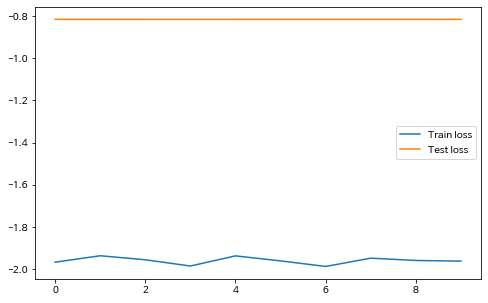

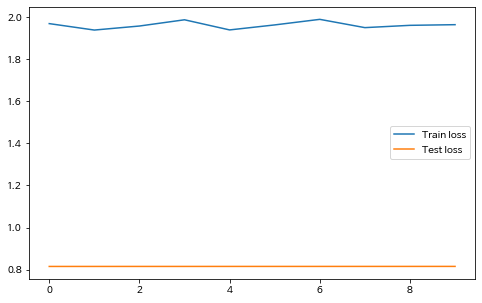

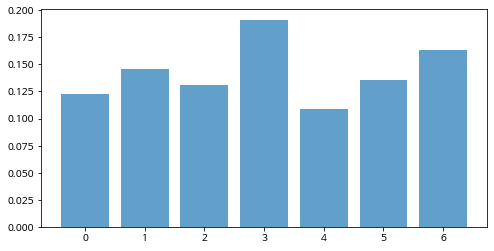

In [106]:
# 월간 수익률 정도의 스케일로 변환한다
xc_train = xc_train.astype('float32') *100
xf_train = xf_train.astype('float32') *100
xc_test = xc_test.astype('float32') *100
xf_test = xf_test.astype('float32') *100


N_TIME = xc_train.shape[1]
N_FUTURE = xf_train.shape[1]
N_STOCKS = xf_train.shape[2]

# 학습 데이터는 shuffling 한다.
#xc_train, xf_train = shuffle(xc_train, xf_train)

# Markowitz Network를 생성한다.
# over confidence를 제어할 조절 변수 정의
GAMMA_CONST = 0.06
REG_CONST = 0.0
SAVE_MODEL = 'data/3-1.MPN_LSTM.h5'

# 최적 포트폴리오를 구축할 목표 함수를 정의한다.
# Markowitz Network에서는 이 함수를 loss로 이용한다. max(objective) = min(-objective)
# y_pred = 마코비츠 네트워크의 출력이 전달된다. (keras 내부 기능)
# y_true = model.fit()에서 전달된 N_FUTURE일 후의 수익률 (xf_train)이 들어온다.
def markowitz_objective(y_true, y_pred):
    W = y_pred      # 마코비츠 네트워크의 출력
    xf_rtn = y_true
    W = tf.expand_dims(W, axis = 1)   # W = (None, 1, 50)
    R = tf.expand_dims(tf.reduce_mean(xf_rtn, axis = 1), axis = 2) # R = (None, 50, 1)
    C = tfp.stats.covariance(xf_rtn, sample_axis=1)

    rtn = tf.matmul(W, R)  
    vol = tf.matmul(W, tf.matmul(C, tf.transpose(W, perm = [0, 2, 1]))) * GAMMA_CONST
    reg = tf.reduce_sum(tf.square(W), axis = -1) * REG_CONST
    objective = rtn - vol - reg
    
    return -tf.reduce_sum(objective, axis=0)


lstm = LSTM( units = 7, # units의 값은 layer 통일이 제일 효과적이다.
             input_shape=(N_TIME, N_STOCKS),  #(4980, 20, 5)  --> (20,5),    
             dropout=0.0,
             recurrent_dropout=0.0,
             return_sequences=False
      )
model = Sequential()
model.add( lstm )
model.add( Dense(N_STOCKS, activation='tanh') )
model.add(Activation('softmax'))


# 마코비츠의 최적 weights
with tf.device("/device:GPU:0"):
    #y_output = Activation('softmax')(y_output)

    
    model.compile(loss = markowitz_objective, 
                optimizer = Adam(learning_rate = 1e-5),
                )
    stop = EarlyStopping(patience=10, monitor='val_loss')

    model.summary()

    # MPN을 학습하고 결과를 저장한다.
    hist = model.fit(xc_train, xf_train, epochs=10, batch_size = 64, 
                     #callbacks=[stop],
                    validation_data = (xc_test, xf_test))
    #model.save(SAVE_MODEL)

# loss trajectory를 확인한다.
plt.figure(figsize=(8, 5))
plt.plot(hist.history['loss'], label='Train loss')
plt.plot(hist.history['val_loss'], label='Test loss')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(np.negative(hist.history['loss']), label='Train loss')
plt.plot(np.negative(hist.history['val_loss']), label='Test loss')
plt.legend()
plt.show()

# 최적 포트폴리오 결과 확인용 코드
def check_w(n = 0):
    plt.figure(figsize=(8, 4))
    y_pred = model.predict(xc_test[n].reshape(1, N_TIME, N_STOCKS))[0]
    plt.bar(np.arange(N_STOCKS), y_pred, alpha = 0.7)
    plt.show()
    
check_w(0)

# 백테스팅

In [107]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Markowitz's Portfolio Network (MPN)을 이용해서 최적 포트폴리오를 구축한다.
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model


N_TIME = xc_test.shape[1]
N_FUTURE = xf_test.shape[1]
N_STOCKS = xf_test.shape[2]

# 저장된 모델을 가져온다.
lstm_model = model

# MPN을 이용해서 백 테스트를 수행한다.
# --------------------------------
lstm_value = [10000]   # portfolio의 초기 value
crp_value = [10000]   # CRP의 초기 value
w_crp = np.ones(N_STOCKS) / N_STOCKS   # CRP 비율 (균등 비율)

w_hist_lstm = []
for i in range(0, xc_test.shape[0], N_FUTURE):
    # LSTM으로 W를 추정한다.
    x = xc_test[i][np.newaxis,:, :]
    w_lstm = lstm_model.predict(x)[0]
    w_hist_lstm.append(w_lstm)
    
    # 다음 기의 누적 수익률
    m_rtn = np.sum(xf_test[i]/100, axis = 0)
    
    # 누적 수익률과 w_prt (W)로 포트폴리오의 수익률을 계산한다.
    lstm_value.append(lstm_value[-1] * np.exp(np.dot(w_lstm, m_rtn)))
    crp_value.append(crp_value[-1] * np.exp(np.dot(w_crp, m_rtn)))
    

print('\nBack test를 완료했습니다.')



Back test를 완료했습니다.


# 포트폴리오 성과 평가

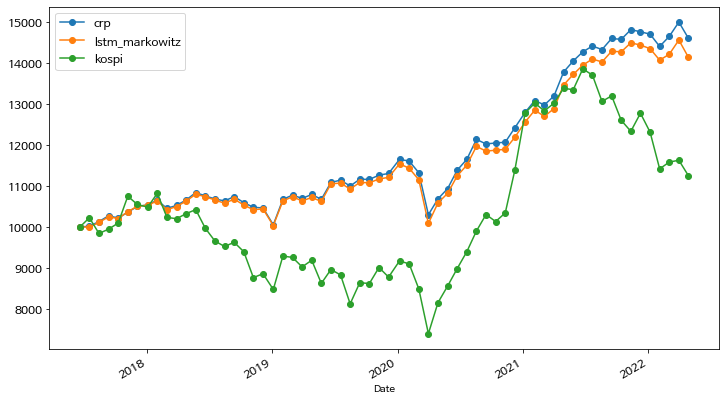

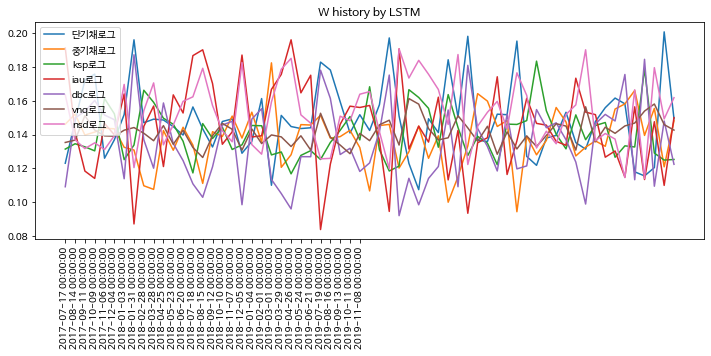


포트폴리오 수익률 (연간):
crp_rtn      0.072127
lstm_rtn     0.065975
sp500_rtn    0.022451
dtype: float64

포트폴리오 위험 (연간):
crp_rtn      0.022594
lstm_rtn     0.023206
sp500_rtn    0.047066
dtype: float64

Sharp Ratio :
crp_rtn      3.192322
lstm_rtn     2.843030
sp500_rtn    0.477018
dtype: float64


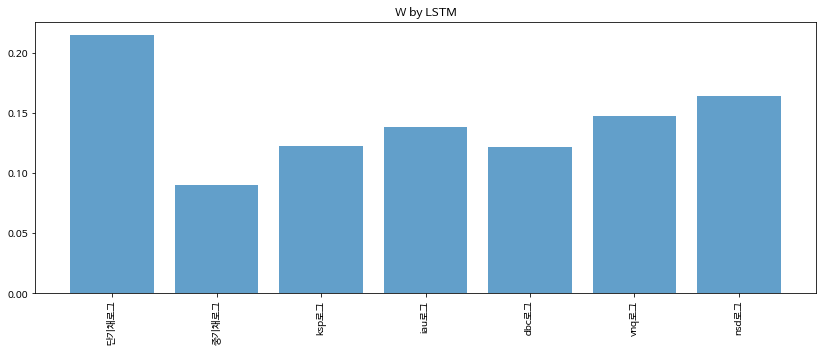

In [108]:
# 평가 시점의 날짜를 발췌한다.
idx = np.arange(0, len(test_date), N_FUTURE)

# Markowitz 성과와 CRP 성과를 데이터 프레임에 기록해 둔다.
perf_df = pd.DataFrame({'crp':crp_value, 
                        'lstm_markowitz':lstm_value
                        }, 
                       index=test_date[idx])

# S&P500 index와 포트폴리오 성과를 비교해 본다.
sp500 = pd.DataFrame(df3['코스피'])

# 수익률을 계산해서 perf_df와 시작 위치를 맞춘다 (초기 value를 맞춘다).
sp500 = sp500[test_date[0]:]
sp_trans = lstm_value[0] / sp500['코스피'][0]
perf_df['kospi'] = sp500['코스피'] * sp_trans

# S&P500 index (시장), CRP, 그리고 MPN의 성과를 비교한다.
p = perf_df.plot(figsize=(12, 7), style = '-o', fontsize=12)
p.legend(fontsize=12)
##그래프저장
plt.show()

# weights history를 확인한다.
w_hist_lstm = np.array(w_hist_lstm)

# 종목 이름을 읽어온다.
symbol = rtn_df.columns

n = 7
plt.figure(figsize=(12, 4))
for i in range(n):
    plt.plot(w_hist_lstm[:, i], label=symbol[i])
plt.legend(loc='upper left')
plt.title('W history by LSTM')
plt.xticks(np.arange(0, 31), list(perf_df.index[1:]), rotation='vertical')
plt.show()

# 포트폴리오 수익률, 위험, SR을 측정한다.
rp_df = perf_df.copy()
rp_df['crp_rtn'] = np.log(rp_df['crp']) - np.log(rp_df['crp'].shift(1))
rp_df['lstm_rtn'] = np.log(rp_df['lstm_markowitz']) - np.log(rp_df['lstm_markowitz'].shift(1))
rp_df['sp500_rtn'] = np.log(rp_df['kospi']) - np.log(rp_df['kospi'].shift(1))
rp_df = rp_df.dropna()

# 포트폴리오 수익률 (연간)
rp = rp_df[['crp_rtn', 'lstm_rtn', 'sp500_rtn']].mean()
# 20일 = 약 1개월, 1년 = 12개월
rp*=12
print('\n포트폴리오 수익률 (연간):')
print(rp)

# 포트폴리오 위험 (연간 표준편차)
sp = rp_df[['crp_rtn', 'lstm_rtn', 'sp500_rtn']].std()
print('\n포트폴리오 위험 (연간):')
print(sp)

# Sharp ratio
print('\nSharp Ratio :')
print(rp / sp)

# 최적 포트폴리오 결과 확인용 코드 (참고용)
def check_w(n = 0):
    plt.figure(figsize=(14,5))
    x = xc_test[n][np.newaxis,:,:] * 20.0
    w_lstm = lstm_model.predict(x)[0]
    plt.bar(np.arange(N_STOCKS), w_lstm, alpha = 0.7)
    plt.xticks(np.arange(7), list(symbol), rotation='vertical')
    plt.title('W by LSTM')
    plt.show()
    
check_w(0)

## 가중치 DF 저장 (일자별)

In [109]:
w_hist_lstm = []
for i in range(0, xc_test.shape[0]):
    # LSTM으로 W를 추정한다.
    x = xc_test[i][np.newaxis,:, :]
    w_lstm = lstm_model.predict(x)[0]
    w_hist_lstm.append(w_lstm)


In [110]:
idx = np.arange(0, len(test_date))
date=test_date[idx]

In [111]:
len(w_hist_lstm)

1250

In [112]:
W_df=pd.DataFrame(w_hist_lstm[:-1],columns=rtn_df.columns,index=list(date)[20:])
W_df

,단기채로그,중기채로그,ksp로그,iau로그,dbc로그,vnq로그,nsd로그
2017-07-17,0.123057,0.146154,0.131430,0.191288,0.109137,0.135364,0.163570
2017-07-18,0.122790,0.141931,0.134838,0.197854,0.108814,0.130657,0.163115
2017-07-19,0.123809,0.141084,0.145876,0.187052,0.123640,0.130306,0.148232
2017-07-20,0.125474,0.144031,0.147536,0.180699,0.132213,0.131201,0.138847
2017-07-21,0.127188,0.150836,0.145724,0.168575,0.143111,0.132689,0.131875
...,...,...,...,...,...,...,...
2022-05-04,0.146240,0.134478,0.147454,0.151948,0.131682,0.137507,0.150690
2022-05-05,0.141304,0.147150,0.129413,0.164772,0.117197,0.139372,0.160792
2022-05-06,0.162357,0.144741,0.126254,0.142191,0.131712,0.144700,0.148045
2022-05-09,0.171178,0.143345,0.133146,0.116757,0.151384,0.148142,0.136046


In [113]:
# W_df.to_csv("/content/gdrive/My Drive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/하락/기간"+str(perf_df.index[1])[:10]+"-"+str(perf_df.index[-1])[:10]+"감마"+str(GAMMA_CONST)+"REG"+str(REG_CONST)+"가중치(일자별).csv")


# 타 펀드 비교(KB)

In [114]:
kb=pd.read_excel("/content/gdrive/My Drive/FINAL TEAM/파이널프로젝트/비주식팀/Data/kb아무것도못하쥬.xlsx")
kb.일자=pd.to_datetime(kb.일자)
kb=kb.set_index('일자')
#일자설정
kb=kb.loc[perf_df.index[0]:perf_df.index[-1]]
kb['금액']=10000
kb['수익률(%)']=kb['수익률(%)']*0.01
for i in range(1,kb.shape[0]):
    kb.iloc[i,1]=kb.iloc[i,0]*kb.iloc[i-1,1]+kb.iloc[i-1,1]
p_df=perf_df.copy()
p_df=p_df.reset_index()
kb=kb.reset_index()
grp=pd.merge(p_df,kb,left_on='Date',right_on='일자',how='outer')
grp=grp.set_index('Date')
grp=grp[['crp', 'lstm_markowitz', 'kospi', '금액']]
grp.columns=['crp', 'lstm_markowitz', 'kospi', 'KB펀드']
grp=grp.dropna()

# 타 펀드 비교 <미래에셋>

In [115]:
fa=pd.read_csv("/content/gdrive/My Drive/FINAL TEAM/파이널프로젝트/비주식팀/Data/미래에셋.csv")
fa=fa.T
fa=fa.iloc[1:]
fa=fa.reset_index()
fa['index']=pd.to_datetime(fa['index'])
fa=fa.set_index('index')
fa.columns=['투자수익률','비교지수']
fa['미래에셋']=fa['투자수익률']*0.01*10000+10000
fa['미래에셋_pct']=fa['미래에셋'].pct_change(1)
#일자설정
fa=fa.loc[perf_df.index[0]:perf_df.index[-1]]
fa['미래에셋']=10000
for i in range(1,fa.shape[0]):
    fa.iloc[i,2]=fa.iloc[i,3]*fa.iloc[i-1,2]+fa.iloc[i-1,2]
fa=fa.reset_index()
fa['index']=pd.to_datetime(fa['index'])
grp=pd.merge(grp.reset_index(),fa[['index','미래에셋']],left_on='Date',right_on='index',how='outer')
grp=grp[['Date','lstm_markowitz','kospi','미래에셋','KB펀드']]
grp=grp.dropna()
grp=grp.set_index('Date')

# 차트 이미지 저장

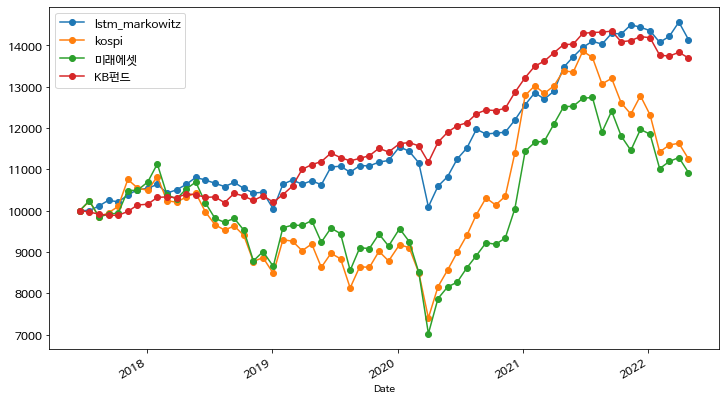

In [116]:
p = grp.plot(figsize=(12, 7), style = '-o', fontsize=12)
p.legend(fontsize=12)
# plt.savefig("/content/gdrive/My Drive/FINAL TEAM/파이널프로젝트/비주식팀/Data/차트/하락/기간"+str(perf_df.index[1])[:10]+"-"+str(perf_df.index[-1])[:10]+"감마"+str(GAMMA_CONST)+"REG"+str(REG_CONST)+"가중치.png")
plt.show()

In [117]:
ㅁㅇㄻㄴㅇㄻㄴㅇㄻㄴㅇㄻㄴㅇㄻㄴㅇㄻㄴㅇㄻㄴㅇㄻㄴㄹ

NameError: ignored

# 주식 전략 결합 안전추구형

## 안전추구형

In [434]:
log_df=pd.read_csv("/content/gdrive/My Drive/FINAL TEAM/파이널프로젝트/비주식팀/Data/최종데이터셋.csv")

In [435]:
log_df

,Date,단기채로그,중기채로그,ksp로그,iau로그,dbc로그,vnq로그,nsd로그,상승,코스피
0,2006-03-01,0.000000,0.000000,0.000000,0.001961,-0.002149,0.005808,-0.000493,0,1371.589966
1,2006-03-02,0.000263,-0.000102,-0.002840,0.011332,0.017911,-0.001220,-0.012176,0,1367.699951
2,2006-03-03,0.000105,0.000438,-0.028741,-0.007067,0.009256,-0.005508,0.017103,0,1328.949951
3,2006-03-06,0.000326,-0.000830,0.011826,-0.018973,-0.016041,0.017942,-0.018103,0,1344.760010
4,2006-03-07,0.000094,-0.000840,-0.021110,-0.005072,-0.017601,-0.012129,-0.043212,0,1316.670044
...,...,...,...,...,...,...,...,...,...,...
4192,2022-05-04,0.000084,-0.000864,-0.001079,0.009819,0.030728,0.011425,0.014217,0,2677.570068
4193,2022-05-05,0.000000,0.000000,0.000000,-0.004196,-0.005292,-0.027030,-0.033019,0,2677.570068
4194,2022-05-06,0.000109,0.001001,-0.012424,0.001961,0.001061,-0.011940,-0.016993,0,2644.510010
4195,2022-05-09,0.000202,0.002147,0.000000,-0.014940,-0.046284,-0.045043,-0.040948,0,2644.510010


In [436]:
log_df['Date']=pd.to_datetime(log_df['Date'])

In [437]:
r_df=pd.read_csv("/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/주식전략/로그수익률전체_10종목.csv")

In [438]:
r_df=r_df.fillna(0)

In [439]:
r_df.columns

Index(['Unnamed: 0', '유동성기법', '레버리지기법', '그레이엄기법', '린치기법', '버핏기법', '삼대투자기법',
       '성장성기법', '수익성기법', '시장가치기법', '활동성기법'],
      dtype='object')

In [440]:
r_df['Unnamed: 0']=pd.to_datetime(r_df['Unnamed: 0'])
r_df.columns=['Date', '유동성기법', '레버리지기법', '그레이엄기법', '린치기법', '버핏기법', '삼대투자기법',
       '성장성기법', '수익성기법', '시장가치기법', '활동성기법']
r_df=r_df.set_index('Date')

In [441]:
r_df

,유동성기법,레버리지기법,그레이엄기법,린치기법,버핏기법,삼대투자기법,성장성기법,수익성기법,시장가치기법,활동성기법
Date,,,,,,,,,,
2005-04-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2005-04-04,-0.001885,-0.003509,0.003417,0.015300,-0.004737,-0.000839,-0.000324,-0.002091,-0.012773,-0.001492
2005-04-06,-0.005572,0.012566,0.005841,-0.002118,0.011094,0.000858,0.002884,0.007565,-0.000898,0.017410
2005-04-07,-0.002721,-0.010705,-0.004159,-0.001387,-0.001534,-0.002636,0.001947,0.000370,0.000927,-0.009234
2005-04-08,-0.002758,-0.003010,-0.001109,-0.000854,0.002285,-0.004228,0.010989,-0.000463,0.009500,0.006397
...,...,...,...,...,...,...,...,...,...,...
2022-05-10,-0.015892,-0.004799,-0.002160,-0.009955,-0.010384,-0.003993,-0.004541,-0.006504,-0.001658,-0.015276
2022-05-11,0.018021,0.000791,-0.003038,0.012060,0.009773,0.009442,0.009268,0.013275,-0.007461,0.018093
2022-05-12,-0.024158,-0.029275,-0.013050,-0.001186,-0.011456,-0.006010,-0.020785,-0.035540,-0.003394,0.005001


In [442]:
# r_df= r_df.reset_index()
log_df=pd.merge(log_df,r_df, on='Date', how='outer').dropna()

In [443]:
log_df

,Date,단기채로그,중기채로그,ksp로그,iau로그,dbc로그,vnq로그,nsd로그,상승,코스피,유동성기법,레버리지기법,그레이엄기법,린치기법,버핏기법,삼대투자기법,성장성기법,수익성기법,시장가치기법,활동성기법
1,2006-03-02,0.000263,-0.000102,-0.002840,0.011332,0.017911,-0.001220,-0.012176,0.0,1367.699951,-0.004163,0.003148,-0.004245,-0.009235,-0.004180,-0.002885,-0.011703,0.003138,0.001468,0.007272
2,2006-03-03,0.000105,0.000438,-0.028741,-0.007067,0.009256,-0.005508,0.017103,0.0,1328.949951,-0.016589,-0.022778,-0.017546,-0.022754,-0.024339,-0.019855,-0.019931,-0.023816,-0.042204,-0.022764
3,2006-03-06,0.000326,-0.000830,0.011826,-0.018973,-0.016041,0.017942,-0.018103,0.0,1344.760010,0.011637,0.011190,0.004478,0.003144,0.012759,0.010315,0.011755,0.010877,0.021549,0.014470
4,2006-03-07,0.000094,-0.000840,-0.021110,-0.005072,-0.017601,-0.012129,-0.043212,0.0,1316.670044,-0.016843,-0.028491,-0.011694,-0.002772,-0.025226,-0.013850,-0.019911,-0.026519,-0.021908,-0.025480
5,2006-03-08,0.000203,0.000818,-0.001992,-0.019625,-0.016154,0.005173,0.007549,0.0,1314.050049,-0.007919,-0.004598,0.010290,0.001887,-0.014189,-0.006048,-0.010333,-0.003670,0.000692,-0.003637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4191,2022-05-03,0.000032,-0.000973,-0.002604,0.002823,-0.014052,0.012346,0.007312,0.0,2680.459961,0.002114,-0.006505,-0.008353,-0.003740,0.001091,-0.004454,-0.004513,-0.006798,-0.001810,-0.008891
4192,2022-05-04,0.000084,-0.000864,-0.001079,0.009819,0.030728,0.011425,0.014217,0.0,2677.570068,-0.009320,-0.003745,-0.006407,0.001788,-0.004029,-0.000976,0.000924,-0.002858,0.006830,0.002055
4194,2022-05-06,0.000109,0.001001,-0.012424,0.001961,0.001061,-0.011940,-0.016993,0.0,2644.510010,0.001078,-0.013734,-0.006216,-0.013486,-0.012977,-0.015054,-0.014405,-0.012405,-0.008364,-0.006202
4195,2022-05-09,0.000202,0.002147,0.000000,-0.014940,-0.046284,-0.045043,-0.040948,0.0,2644.510010,-0.016910,-0.011615,-0.028295,-0.018643,-0.011348,-0.021987,-0.013603,-0.014154,-0.013436,-0.006623


In [444]:
log_df = log_df.set_index('Date')

## 안전추구형

In [445]:
극안전형=pd.read_csv("/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/전체/전체19.csv")


In [446]:
극안전형

,Unnamed: 0.1,날짜,단기채로그,중기채로그,ksp로그,iau로그,dbc로그,vnq로그,nsd로그
0,2017-07-17,2017-07-17,0.119013,0.192846,0.21566,0.086637,0.053598,0.065426,0.266820
1,2017-07-18,2017-07-18,0.119013,0.192846,0.21566,0.086637,0.053598,0.065426,0.266820
2,2017-07-19,2017-07-19,0.119013,0.192846,0.21566,0.086637,0.053598,0.065426,0.266820
3,2017-07-20,2017-07-20,0.119013,0.192846,0.21566,0.086637,0.053598,0.065426,0.266820
4,2017-07-21,2017-07-21,0.119013,0.192846,0.21566,0.086637,0.053598,0.065426,0.266820
...,...,...,...,...,...,...,...,...,...
1244,2022-05-04,2022-05-04,0.216019,0.178287,0.08117,0.207821,0.087656,0.105680,0.123367
1245,2022-05-05,2022-05-05,0.216019,0.178287,0.08117,0.207821,0.087656,0.105680,0.123367
1246,2022-05-06,2022-05-06,0.216019,0.178287,0.08117,0.207821,0.087656,0.105680,0.123367
1247,2022-05-09,2022-05-09,0.216019,0.178287,0.08117,0.207821,0.087656,0.105680,0.123367


In [447]:
극안전형 = 극안전형.drop('Unnamed: 0.1',axis=1)

In [448]:
# 극안전형.columns=['Date', '단기채w', '중기채w', 'kspw', 'iauw', 'dbcw', 'vnqw',
#        'nsdw']
극안전형.columns=[ 'Date',
 '단기채로그',
 '중기채로그',
 'ksp로그',
 'iau로그',
 'dbc로그',
 'vnq로그',
 'nsd로그']
극안전형.Date=pd.to_datetime(극안전형.Date)

In [449]:
극안전형

,Date,단기채로그,중기채로그,ksp로그,iau로그,dbc로그,vnq로그,nsd로그
0,2017-07-17,0.119013,0.192846,0.21566,0.086637,0.053598,0.065426,0.266820
1,2017-07-18,0.119013,0.192846,0.21566,0.086637,0.053598,0.065426,0.266820
2,2017-07-19,0.119013,0.192846,0.21566,0.086637,0.053598,0.065426,0.266820
3,2017-07-20,0.119013,0.192846,0.21566,0.086637,0.053598,0.065426,0.266820
4,2017-07-21,0.119013,0.192846,0.21566,0.086637,0.053598,0.065426,0.266820
...,...,...,...,...,...,...,...,...
1244,2022-05-04,0.216019,0.178287,0.08117,0.207821,0.087656,0.105680,0.123367
1245,2022-05-05,0.216019,0.178287,0.08117,0.207821,0.087656,0.105680,0.123367
1246,2022-05-06,0.216019,0.178287,0.08117,0.207821,0.087656,0.105680,0.123367
1247,2022-05-09,0.216019,0.178287,0.08117,0.207821,0.087656,0.105680,0.123367


In [342]:
log_df=pd.merge(log_df,극안전형,on='Date',how='inner')

In [343]:
log_df['레버리지기법']

0       0.011354
1       0.001328
2      -0.001580
3       0.003248
4      -0.004953
          ...   
1178   -0.006505
1179   -0.003745
1180   -0.013734
1181   -0.011615
1182   -0.004799
Name: 레버리지기법, Length: 1183, dtype: float64

In [344]:
극안전형

,Date,단기채로그,중기채로그,ksp로그,iau로그,dbc로그,vnq로그,nsd로그
0,2017-07-17,0.333968,0.299315,0.130224,0.056268,0.073147,0.053250,0.053828
1,2017-07-18,0.333968,0.299315,0.130224,0.056268,0.073147,0.053250,0.053828
2,2017-07-19,0.333968,0.299315,0.130224,0.056268,0.073147,0.053250,0.053828
3,2017-07-20,0.333968,0.299315,0.130224,0.056268,0.073147,0.053250,0.053828
4,2017-07-21,0.333968,0.299315,0.130224,0.056268,0.073147,0.053250,0.053828
...,...,...,...,...,...,...,...,...
1244,2022-05-04,0.294261,0.174504,0.078773,0.183823,0.083394,0.087942,0.097303
1245,2022-05-05,0.294261,0.174504,0.078773,0.183823,0.083394,0.087942,0.097303
1246,2022-05-06,0.294261,0.174504,0.078773,0.183823,0.083394,0.087942,0.097303
1247,2022-05-09,0.294261,0.174504,0.078773,0.183823,0.083394,0.087942,0.097303


In [345]:
log_df.columns

Index(['Date', '단기채로그_x', '중기채로그_x', 'ksp로그_x', 'iau로그_x', 'dbc로그_x',
       'vnq로그_x', 'nsd로그_x', '상승', '코스피', '유동성기법', '레버리지기법', '그레이엄기법', '린치기법',
       '버핏기법', '삼대투자기법', '성장성기법', '수익성기법', '시장가치기법', '활동성기법', '단기채로그_y',
       '중기채로그_y', 'ksp로그_y', 'iau로그_y', 'dbc로그_y', 'vnq로그_y', 'nsd로그_y'],
      dtype='object')

In [346]:
log_df.columns = ['Date',
 '단기채로그',
 '중기채로그',
 'ksp로그',
 'iau로그',
 'dbc로그',
 'vnq로그',
 'nsd로그',
 '상승',
 '코스피',
 '유동성기법',
 '레버리지기법',
 '그레이엄기법',
 '린치기법',
 '버핏기법',
 '삼대투자기법',
 '성장성기법',
 '수익성기법',
 '시장가치기법',
 '활동성기법',
 '단기채w',
 '중기채w',
 'kspw',
 'iauw',
 'dbcw',
 'vnqw',
 'nsdw']

In [347]:
# log_df = log_df[['Date','단기채로그_y', '중기채로그_y', 'ksp로그_y', 'iau로그_y', 'dbc로그_y', 'vnq로그_y', 'nsd로그_y' ,'상승', '코스피', '유동성기법', '레버리지기법', '그레이엄기법', '린치기법', '버핏기법', '삼대투자기법',
#  '성장성기법', '수익성기법', '시장가치기법', '활동성기법' ]]

In [348]:
# log_df.columns = ['Date', '단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그', '상승', '코스피', '유동성기법', '레버리지기법', '그레이엄기법', '린치기법', '버핏기법', '삼대투자기법', '성장성기법',
#  '수익성기법', '시장가치기법', '활동성기법']

In [349]:
log_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1183 entries, 0 to 1182
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1183 non-null   datetime64[ns]
 1   단기채로그   1183 non-null   float64       
 2   중기채로그   1183 non-null   float64       
 3   ksp로그   1183 non-null   float64       
 4   iau로그   1183 non-null   float64       
 5   dbc로그   1183 non-null   float64       
 6   vnq로그   1183 non-null   float64       
 7   nsd로그   1183 non-null   float64       
 8   상승      1183 non-null   float64       
 9   코스피     1183 non-null   float64       
 10  유동성기법   1183 non-null   float64       
 11  레버리지기법  1183 non-null   float64       
 12  그레이엄기법  1183 non-null   float64       
 13  린치기법    1183 non-null   float64       
 14  버핏기법    1183 non-null   float64       
 15  삼대투자기법  1183 non-null   float64       
 16  성장성기법   1183 non-null   float64       
 17  수익성기법   1183 non-null   float64       
 18  시장가치기법  

In [351]:
#기간별로 정렬
log_df=log_df.sort_values(by=['Date'], ascending=True)
log_df.index = log_df['Date']

In [352]:
# log_df.to_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/로그디에프/로그디에프7.csv',index=True)

# 여기서부터 수정한 로그디에프

In [ ]:
# up_2017=df.loc['2017-01-31' : '2018-03-30']    184

# down_2018=df.loc['2018-03-31':'2019-03-30']

# up_2019=df.loc['2019-03-31' : '2019-07-30']   529

# down_2019=df.loc['2019-07-31':'2019-10-30']

# up_2020=df.loc['2019-10-31' : '2020-02-28']   680

# down_2020=df.loc['2020-02-29':'2020-06-29']

# up_2021=df.loc['2020-06-30' : '2021-09-29']     1091

# down_2021=df.loc['2021-09-30':'2022-05-01']

In [398]:
로그디에프25 = pd.read_excel('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/로그디에프/로그디에프25.xlsx')

In [399]:
로그디에프25.to_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/로그디에프/로그디에프25.csv')

In [486]:
로그디에프13 = pd.read_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/로그디에프/로그디에프13.csv')

In [487]:
로그디에프13

,Unnamed: 0,Date,단기채로그,중기채로그,ksp로그,iau로그,dbc로그,vnq로그,nsd로그,상승,...,수익성기법,시장가치기법,활동성기법,단기채w,중기채w,kspw,iauw,dbcw,vnqw,nsdw
0,0,2017-07-17,0.000108,0.000028,0.004327,0.004225,-0.003447,0.008032,0.006033,0,...,0.008741,0.004245,0.004319,0.290343,0.245690,0.164265,0.06995,0.087092,0.065627,0.077033
1,1,2017-07-18,0.000048,0.000205,0.000388,0.007560,0.004135,-0.002152,0.002933,0,...,0.001004,-0.005138,-0.007171,0.290343,0.245690,0.164265,0.06995,0.087092,0.065627,0.077033
2,2,2017-07-19,0.000027,0.000070,0.001606,-0.001675,0.008901,0.007511,0.001533,0,...,0.000542,0.005040,0.002389,0.290343,0.245690,0.164265,0.06995,0.087092,0.065627,0.077033
3,3,2017-07-20,0.000041,0.000339,0.004885,0.001675,-0.001364,-0.004643,0.002920,0,...,0.006011,0.010601,0.001227,0.290343,0.245690,0.164265,0.06995,0.087092,0.065627,0.077033
4,4,2017-07-21,0.000039,0.000426,0.003361,0.009163,-0.013746,-0.000716,0.009947,0,...,-0.002766,0.008145,-0.001462,0.290343,0.245690,0.164265,0.06995,0.087092,0.065627,0.077033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,1178,2022-05-03,0.000032,-0.000973,-0.002604,0.002823,-0.014052,0.012346,0.007312,0,...,-0.002604,-0.002604,-0.002604,0.264888,0.172034,0.079016,0.19217,0.087103,0.096868,0.107920
1179,1179,2022-05-04,0.000084,-0.000864,-0.001079,0.009819,0.030728,0.011425,0.014217,0,...,-0.001079,-0.001079,-0.001079,0.264888,0.172034,0.079016,0.19217,0.087103,0.096868,0.107920
1180,1180,2022-05-06,0.000109,0.001001,-0.012424,0.001961,0.001061,-0.011940,-0.016993,0,...,-0.012424,-0.012424,-0.012424,0.264888,0.172034,0.079016,0.19217,0.087103,0.096868,0.107920
1181,1181,2022-05-09,0.000202,0.002147,0.000000,-0.014940,-0.046284,-0.045043,-0.040948,0,...,0.000000,0.000000,0.000000,0.264888,0.172034,0.079016,0.19217,0.087103,0.096868,0.107920


In [488]:
로그디에프13 = 로그디에프13.drop(['Unnamed: 0'],axis=1)

In [489]:
log_df = 로그디에프13

In [490]:
log_df.index = log_df['Date']


In [491]:
log_df['금액']=10000

In [492]:
log_df

,Date,단기채로그,중기채로그,ksp로그,iau로그,dbc로그,vnq로그,nsd로그,상승,코스피,...,시장가치기법,활동성기법,단기채w,중기채w,kspw,iauw,dbcw,vnqw,nsdw,금액
Date,,,,,,,,,,,,,,,,,,,,,
2017-07-17,2017-07-17,0.000108,0.000028,0.004327,0.004225,-0.003447,0.008032,0.006033,0,2425.100098,...,0.004245,0.004319,0.290343,0.245690,0.164265,0.06995,0.087092,0.065627,0.077033,10000
2017-07-18,2017-07-18,0.000048,0.000205,0.000388,0.007560,0.004135,-0.002152,0.002933,0,2426.040039,...,-0.005138,-0.007171,0.290343,0.245690,0.164265,0.06995,0.087092,0.065627,0.077033,10000
2017-07-19,2017-07-19,0.000027,0.000070,0.001606,-0.001675,0.008901,0.007511,0.001533,0,2429.939941,...,0.005040,0.002389,0.290343,0.245690,0.164265,0.06995,0.087092,0.065627,0.077033,10000
2017-07-20,2017-07-20,0.000041,0.000339,0.004885,0.001675,-0.001364,-0.004643,0.002920,0,2441.840088,...,0.010601,0.001227,0.290343,0.245690,0.164265,0.06995,0.087092,0.065627,0.077033,10000
2017-07-21,2017-07-21,0.000039,0.000426,0.003361,0.009163,-0.013746,-0.000716,0.009947,0,2450.060059,...,0.008145,-0.001462,0.290343,0.245690,0.164265,0.06995,0.087092,0.065627,0.077033,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-03,2022-05-03,0.000032,-0.000973,-0.002604,0.002823,-0.014052,0.012346,0.007312,0,2680.459961,...,-0.002604,-0.002604,0.264888,0.172034,0.079016,0.19217,0.087103,0.096868,0.107920,10000
2022-05-04,2022-05-04,0.000084,-0.000864,-0.001079,0.009819,0.030728,0.011425,0.014217,0,2677.570068,...,-0.001079,-0.001079,0.264888,0.172034,0.079016,0.19217,0.087103,0.096868,0.107920,10000
2022-05-06,2022-05-06,0.000109,0.001001,-0.012424,0.001961,0.001061,-0.011940,-0.016993,0,2644.510010,...,-0.012424,-0.012424,0.264888,0.172034,0.079016,0.19217,0.087103,0.096868,0.107920,10000


In [407]:
log_df = log_df.drop('Unnamed: 0.1',axis=1)

# check

In [493]:
log_df.columns

Index(['Date', '단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그',
       '상승', '코스피', '유동성기법', '레버리지기법', '그레이엄기법', '린치기법', '버핏기법', '삼대투자기법',
       '성장성기법', '수익성기법', '시장가치기법', '활동성기법', '단기채w', '중기채w', 'kspw', 'iauw',
       'dbcw', 'vnqw', 'nsdw', '금액'],
      dtype='object')

In [494]:
# log_df[['단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그']]=log_df[['단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그']].cumsum()

In [495]:
# log_df[['유동성w', '레버리지w','그레이엄w', '린치w', '버핏w', '삼대투자w','성장성w', '수익성w', '시장가치w', '활동성w']]=log_df[['유동성기법','레버리지기법','그레이엄기법', '린치기법', '버핏기법', '삼대투자기법',
    #    '성장성기법', '수익성기법', '시장가치기법', '활동성기법']].cumsum()

In [496]:
# log_df['유동성추이']=log_df['금액']*log_df['단기채w']*np.exp(log_df['단기채로그'])+log_df['금액']*log_df['중기채w']*np.exp(log_df['중기채로그'])+log_df['금액']*log_df['iauw']*np.exp(log_df['iau로그'])+log_df['금액']*log_df['dbcw']*np.exp(log_df['dbc로그'])+log_df['금액']*log_df['vnqw']*np.exp(log_df['vnq로그'])+log_df['금액']*log_df['nsdw']*np.exp(log_df['nsd로그'])+log_df['금액']*log_df['kspw']*np.exp(log_df['유동성기법'])
# log_df['레버리지추이']=log_df['금액']*log_df['단기채w']*np.exp(log_df['단기채로그'])+log_df['금액']*log_df['중기채w']*np.exp(log_df['중기채로그'])+log_df['금액']*log_df['iauw']*np.exp(log_df['iau로그'])+log_df['금액']*log_df['dbcw']*np.exp(log_df['dbc로그'])+log_df['금액']*log_df['vnqw']*np.exp(log_df['vnq로그'])+log_df['금액']*log_df['nsdw']*np.exp(log_df['nsd로그'])+log_df['금액']*log_df['kspw']*np.exp(log_df['레버리지기법'])
# log_df['그레이엄추이']=log_df['금액']*log_df['단기채w']*np.exp(log_df['단기채로그'])+log_df['금액']*log_df['중기채w']*np.exp(log_df['중기채로그'])+log_df['금액']*log_df['iauw']*np.exp(log_df['iau로그'])+log_df['금액']*log_df['dbcw']*np.exp(log_df['dbc로그'])+log_df['금액']*log_df['vnqw']*np.exp(log_df['vnq로그'])+log_df['금액']*log_df['nsdw']*np.exp(log_df['nsd로그'])+log_df['금액']*log_df['kspw']*np.exp(log_df['그레이엄기법'])
# log_df['린치추이']=log_df['금액']*log_df['단기채w']*np.exp(log_df['단기채로그'])+log_df['금액']*log_df['중기채w']*np.exp(log_df['중기채로그'])+log_df['금액']*log_df['iauw']*np.exp(log_df['iau로그'])+log_df['금액']*log_df['dbcw']*np.exp(log_df['dbc로그'])+log_df['금액']*log_df['vnqw']*np.exp(log_df['vnq로그'])+log_df['금액']*log_df['nsdw']*np.exp(log_df['nsd로그'])+log_df['금액']*log_df['kspw']*np.exp(log_df['린치기법'])
# log_df['버핏추이']=log_df['금액']*log_df['단기채w']*np.exp(log_df['단기채로그'])+log_df['금액']*log_df['중기채w']*np.exp(log_df['중기채로그'])+log_df['금액']*log_df['iauw']*np.exp(log_df['iau로그'])+log_df['금액']*log_df['dbcw']*np.exp(log_df['dbc로그'])+log_df['금액']*log_df['vnqw']*np.exp(log_df['vnq로그'])+log_df['금액']*log_df['nsdw']*np.exp(log_df['nsd로그'])+log_df['금액']*log_df['kspw']*np.exp(log_df['버핏기법'])
# log_df['삼대투자추이']=log_df['금액']*log_df['단기채w']*np.exp(log_df['단기채로그'])+log_df['금액']*log_df['중기채w']*np.exp(log_df['중기채로그'])+log_df['금액']*log_df['iauw']*np.exp(log_df['iau로그'])+log_df['금액']*log_df['dbcw']*np.exp(log_df['dbc로그'])+log_df['금액']*log_df['vnqw']*np.exp(log_df['vnq로그'])+log_df['금액']*log_df['nsdw']*np.exp(log_df['nsd로그'])+log_df['금액']*log_df['kspw']*np.exp(log_df['삼대투자기법'])
# log_df['성장성추이']=log_df['금액']*log_df['단기채w']*np.exp(log_df['단기채로그'])+log_df['금액']*log_df['중기채w']*np.exp(log_df['중기채로그'])+log_df['금액']*log_df['iauw']*np.exp(log_df['iau로그'])+log_df['금액']*log_df['dbcw']*np.exp(log_df['dbc로그'])+log_df['금액']*log_df['vnqw']*np.exp(log_df['vnq로그'])+log_df['금액']*log_df['nsdw']*np.exp(log_df['nsd로그'])+log_df['금액']*log_df['kspw']*np.exp(log_df['성장성기법'])
# log_df['수익성추이']=log_df['금액']*log_df['단기채w']*np.exp(log_df['단기채로그'])+log_df['금액']*log_df['중기채w']*np.exp(log_df['중기채로그'])+log_df['금액']*log_df['iauw']*np.exp(log_df['iau로그'])+log_df['금액']*log_df['dbcw']*np.exp(log_df['dbc로그'])+log_df['금액']*log_df['vnqw']*np.exp(log_df['vnq로그'])+log_df['금액']*log_df['nsdw']*np.exp(log_df['nsd로그'])+log_df['금액']*log_df['kspw']*np.exp(log_df['수익성기법'])
# log_df['시장가치추이']=log_df['금액']*log_df['단기채w']*np.exp(log_df['단기채로그'])+log_df['금액']*log_df['중기채w']*np.exp(log_df['중기채로그'])+log_df['금액']*log_df['iauw']*np.exp(log_df['iau로그'])+log_df['금액']*log_df['dbcw']*np.exp(log_df['dbc로그'])+log_df['금액']*log_df['vnqw']*np.exp(log_df['vnq로그'])+log_df['금액']*log_df['nsdw']*np.exp(log_df['nsd로그'])+log_df['금액']*log_df['kspw']*np.exp(log_df['시장가치기법'])
# log_df['활동성추이']=log_df['금액']*log_df['단기채w']*np.exp(log_df['단기채로그'])+log_df['금액']*log_df['중기채w']*np.exp(log_df['중기채로그'])+log_df['금액']*log_df['iauw']*np.exp(log_df['iau로그'])+log_df['금액']*log_df['dbcw']*np.exp(log_df['dbc로그'])+log_df['금액']*log_df['vnqw']*np.exp(log_df['vnq로그'])+log_df['금액']*log_df['nsdw']*np.exp(log_df['nsd로그'])+log_df['금액']*log_df['kspw']*np.exp(log_df['활동성기법'])


In [497]:
log_df['kospi']=10000
log_df['유동성추이']=10000
log_df['레버리지추이']=10000
log_df['성장성추이']=10000
log_df['수익성추이']=10000
log_df['시장가치추이']=10000
log_df['활동성추이']=10000
log_df['그레이엄추이']=10000
log_df['린치추이']=10000
log_df['버핏추이']=10000
log_df['삼대투자추이']=10000

# 상승만 주식투자전략

In [498]:
for i in range(1,1183):
    log_df['kospi'].iloc[i]=(log_df['kospi'].iloc[i-1]*log_df['단기채w'].iloc[i]*np.exp(log_df['단기채로그'].iloc[i]))+(log_df['kospi'].iloc[i-1]*log_df['중기채w'].iloc[i]*np.exp(log_df['중기채로그'].iloc[i]))+log_df['kospi'].iloc[i-1]*log_df['iauw'].iloc[i]*np.exp(log_df['iau로그'].iloc[i])+log_df['kospi'].iloc[i-1]*log_df['dbcw'].iloc[i]*np.exp(log_df['dbc로그'].iloc[i])+log_df['kospi'].iloc[i-1]*log_df['vnqw'].iloc[i]*np.exp(log_df['vnq로그'].iloc[i])+log_df['kospi'].iloc[i-1]*log_df['nsdw'].iloc[i]*np.exp(log_df['nsd로그'].iloc[i])+log_df['kospi'].iloc[i-1]*log_df['kspw'].iloc[i]*np.exp(log_df['ksp로그'].iloc[i])
    log_df['유동성추이'].iloc[i]=(log_df['유동성추이'].iloc[i-1]*log_df['단기채w'].iloc[i]*np.exp(log_df['단기채로그'].iloc[i]))+(log_df['유동성추이'].iloc[i-1]*log_df['중기채w'].iloc[i]*np.exp(log_df['중기채로그'].iloc[i]))+log_df['유동성추이'].iloc[i-1]*log_df['iauw'].iloc[i]*np.exp(log_df['iau로그'].iloc[i])+log_df['유동성추이'].iloc[i-1]*log_df['dbcw'].iloc[i]*np.exp(log_df['dbc로그'].iloc[i])+log_df['유동성추이'].iloc[i-1]*log_df['vnqw'].iloc[i]*np.exp(log_df['vnq로그'].iloc[i])+log_df['유동성추이'].iloc[i-1]*log_df['nsdw'].iloc[i]*np.exp(log_df['nsd로그'].iloc[i])+log_df['유동성추이'].iloc[i-1]*log_df['kspw'].iloc[i]*np.exp(log_df['유동성기법'].iloc[i])
    log_df['레버리지추이'].iloc[i]=(log_df['레버리지추이'].iloc[i-1]*log_df['단기채w'].iloc[i]*np.exp(log_df['단기채로그'].iloc[i]))+(log_df['레버리지추이'].iloc[i-1]*log_df['중기채w'].iloc[i]*np.exp(log_df['중기채로그'].iloc[i]))+log_df['레버리지추이'].iloc[i-1]*log_df['iauw'].iloc[i]*np.exp(log_df['iau로그'].iloc[i])+log_df['레버리지추이'].iloc[i-1]*log_df['dbcw'].iloc[i]*np.exp(log_df['dbc로그'].iloc[i])+log_df['레버리지추이'].iloc[i-1]*log_df['vnqw'].iloc[i]*np.exp(log_df['vnq로그'].iloc[i])+log_df['레버리지추이'].iloc[i-1]*log_df['nsdw'].iloc[i]*np.exp(log_df['nsd로그'].iloc[i])+log_df['레버리지추이'].iloc[i-1]*log_df['kspw'].iloc[i]*np.exp(log_df['레버리지기법'].iloc[i])
    log_df['성장성추이'].iloc[i]=(log_df['성장성추이'].iloc[i-1]*log_df['단기채w'].iloc[i]*np.exp(log_df['단기채로그'].iloc[i]))+(log_df['성장성추이'].iloc[i-1]*log_df['중기채w'].iloc[i]*np.exp(log_df['중기채로그'].iloc[i]))+log_df['성장성추이'].iloc[i-1]*log_df['iauw'].iloc[i]*np.exp(log_df['iau로그'].iloc[i])+log_df['성장성추이'].iloc[i-1]*log_df['dbcw'].iloc[i]*np.exp(log_df['dbc로그'].iloc[i])+log_df['성장성추이'].iloc[i-1]*log_df['vnqw'].iloc[i]*np.exp(log_df['vnq로그'].iloc[i])+log_df['성장성추이'].iloc[i-1]*log_df['nsdw'].iloc[i]*np.exp(log_df['nsd로그'].iloc[i])+log_df['성장성추이'].iloc[i-1]*log_df['kspw'].iloc[i]*np.exp(log_df['성장성기법'].iloc[i])
    log_df['수익성추이'].iloc[i]=(log_df['수익성추이'].iloc[i-1]*log_df['단기채w'].iloc[i]*np.exp(log_df['단기채로그'].iloc[i]))+(log_df['수익성추이'].iloc[i-1]*log_df['중기채w'].iloc[i]*np.exp(log_df['중기채로그'].iloc[i]))+log_df['수익성추이'].iloc[i-1]*log_df['iauw'].iloc[i]*np.exp(log_df['iau로그'].iloc[i])+log_df['수익성추이'].iloc[i-1]*log_df['dbcw'].iloc[i]*np.exp(log_df['dbc로그'].iloc[i])+log_df['수익성추이'].iloc[i-1]*log_df['vnqw'].iloc[i]*np.exp(log_df['vnq로그'].iloc[i])+log_df['수익성추이'].iloc[i-1]*log_df['nsdw'].iloc[i]*np.exp(log_df['nsd로그'].iloc[i])+log_df['수익성추이'].iloc[i-1]*log_df['kspw'].iloc[i]*np.exp(log_df['수익성기법'].iloc[i])
    log_df['시장가치추이'].iloc[i]=(log_df['시장가치추이'].iloc[i-1]*log_df['단기채w'].iloc[i]*np.exp(log_df['단기채로그'].iloc[i]))+(log_df['시장가치추이'].iloc[i-1]*log_df['중기채w'].iloc[i]*np.exp(log_df['중기채로그'].iloc[i]))+log_df['시장가치추이'].iloc[i-1]*log_df['iauw'].iloc[i]*np.exp(log_df['iau로그'].iloc[i])+log_df['시장가치추이'].iloc[i-1]*log_df['dbcw'].iloc[i]*np.exp(log_df['dbc로그'].iloc[i])+log_df['시장가치추이'].iloc[i-1]*log_df['vnqw'].iloc[i]*np.exp(log_df['vnq로그'].iloc[i])+log_df['시장가치추이'].iloc[i-1]*log_df['nsdw'].iloc[i]*np.exp(log_df['nsd로그'].iloc[i])+log_df['시장가치추이'].iloc[i-1]*log_df['kspw'].iloc[i]*np.exp(log_df['시장가치기법'].iloc[i])
    log_df['활동성추이'].iloc[i]=(log_df['활동성추이'].iloc[i-1]*log_df['단기채w'].iloc[i]*np.exp(log_df['단기채로그'].iloc[i]))+(log_df['활동성추이'].iloc[i-1]*log_df['중기채w'].iloc[i]*np.exp(log_df['중기채로그'].iloc[i]))+log_df['활동성추이'].iloc[i-1]*log_df['iauw'].iloc[i]*np.exp(log_df['iau로그'].iloc[i])+log_df['활동성추이'].iloc[i-1]*log_df['dbcw'].iloc[i]*np.exp(log_df['dbc로그'].iloc[i])+log_df['활동성추이'].iloc[i-1]*log_df['vnqw'].iloc[i]*np.exp(log_df['vnq로그'].iloc[i])+log_df['활동성추이'].iloc[i-1]*log_df['nsdw'].iloc[i]*np.exp(log_df['nsd로그'].iloc[i])+log_df['활동성추이'].iloc[i-1]*log_df['kspw'].iloc[i]*np.exp(log_df['활동성기법'].iloc[i])
    log_df['그레이엄추이'].iloc[i]=(log_df['그레이엄추이'].iloc[i-1]*log_df['단기채w'].iloc[i]*np.exp(log_df['단기채로그'].iloc[i]))+(log_df['그레이엄추이'].iloc[i-1]*log_df['중기채w'].iloc[i]*np.exp(log_df['중기채로그'].iloc[i]))+log_df['그레이엄추이'].iloc[i-1]*log_df['iauw'].iloc[i]*np.exp(log_df['iau로그'].iloc[i])+log_df['그레이엄추이'].iloc[i-1]*log_df['dbcw'].iloc[i]*np.exp(log_df['dbc로그'].iloc[i])+log_df['그레이엄추이'].iloc[i-1]*log_df['vnqw'].iloc[i]*np.exp(log_df['vnq로그'].iloc[i])+log_df['그레이엄추이'].iloc[i-1]*log_df['nsdw'].iloc[i]*np.exp(log_df['nsd로그'].iloc[i])+log_df['그레이엄추이'].iloc[i-1]*log_df['kspw'].iloc[i]*np.exp(log_df['그레이엄기법'].iloc[i])
    log_df['린치추이'].iloc[i]=(log_df['린치추이'].iloc[i-1]*log_df['단기채w'].iloc[i]*np.exp(log_df['단기채로그'].iloc[i]))+(log_df['린치추이'].iloc[i-1]*log_df['중기채w'].iloc[i]*np.exp(log_df['중기채로그'].iloc[i]))+log_df['린치추이'].iloc[i-1]*log_df['iauw'].iloc[i]*np.exp(log_df['iau로그'].iloc[i])+log_df['린치추이'].iloc[i-1]*log_df['dbcw'].iloc[i]*np.exp(log_df['dbc로그'].iloc[i])+log_df['린치추이'].iloc[i-1]*log_df['vnqw'].iloc[i]*np.exp(log_df['vnq로그'].iloc[i])+log_df['린치추이'].iloc[i-1]*log_df['nsdw'].iloc[i]*np.exp(log_df['nsd로그'].iloc[i])+log_df['린치추이'].iloc[i-1]*log_df['kspw'].iloc[i]*np.exp(log_df['린치기법'].iloc[i])
    log_df['버핏추이'].iloc[i]=(log_df['버핏추이'].iloc[i-1]*log_df['단기채w'].iloc[i]*np.exp(log_df['단기채로그'].iloc[i]))+(log_df['버핏추이'].iloc[i-1]*log_df['중기채w'].iloc[i]*np.exp(log_df['중기채로그'].iloc[i]))+log_df['버핏추이'].iloc[i-1]*log_df['iauw'].iloc[i]*np.exp(log_df['iau로그'].iloc[i])+log_df['버핏추이'].iloc[i-1]*log_df['dbcw'].iloc[i]*np.exp(log_df['dbc로그'].iloc[i])+log_df['버핏추이'].iloc[i-1]*log_df['vnqw'].iloc[i]*np.exp(log_df['vnq로그'].iloc[i])+log_df['버핏추이'].iloc[i-1]*log_df['nsdw'].iloc[i]*np.exp(log_df['nsd로그'].iloc[i])+log_df['버핏추이'].iloc[i-1]*log_df['kspw'].iloc[i]*np.exp(log_df['버핏기법'].iloc[i])
    log_df['삼대투자추이'].iloc[i]=(log_df['삼대투자추이'].iloc[i-1]*log_df['단기채w'].iloc[i]*np.exp(log_df['단기채로그'].iloc[i]))+(log_df['삼대투자추이'].iloc[i-1]*log_df['중기채w'].iloc[i]*np.exp(log_df['중기채로그'].iloc[i]))+log_df['삼대투자추이'].iloc[i-1]*log_df['iauw'].iloc[i]*np.exp(log_df['iau로그'].iloc[i])+log_df['삼대투자추이'].iloc[i-1]*log_df['dbcw'].iloc[i]*np.exp(log_df['dbc로그'].iloc[i])+log_df['삼대투자추이'].iloc[i-1]*log_df['vnqw'].iloc[i]*np.exp(log_df['vnq로그'].iloc[i])+log_df['삼대투자추이'].iloc[i-1]*log_df['nsdw'].iloc[i]*np.exp(log_df['nsd로그'].iloc[i])+log_df['삼대투자추이'].iloc[i-1]*log_df['kspw'].iloc[i]*np.exp(log_df['삼대투자기법'].iloc[i])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [499]:
# for i in range(1,1183):
#     log_df['kospi'].iloc[i]=(log_df['kospi'].iloc[i-1]*log_df['단기채w'].iloc[i]+10000*log_df['단기채w'].iloc[i]*0.00012)+(log_df['kospi'].iloc[i-1]*log_df['중기채w'].iloc[i]+10000*log_df['중기채w'].iloc[i]*0.0002172)+log_df['kospi'].iloc[i-1]*log_df['iauw'].iloc[i]*np.exp(log_df['iau로그'].iloc[i])+log_df['kospi'].iloc[i-1]*log_df['dbcw'].iloc[i]*np.exp(log_df['dbc로그'].iloc[i])+log_df['kospi'].iloc[i-1]*log_df['vnqw'].iloc[i]*np.exp(log_df['vnq로그'].iloc[i])+log_df['kospi'].iloc[i-1]*log_df['nsdw'].iloc[i]*np.exp(log_df['nsd로그'].iloc[i])+log_df['kospi'].iloc[i-1]*log_df['kspw'].iloc[i]*np.exp(log_df['ksp로그'].iloc[i])
#     log_df['유동성추이'].iloc[i]=(log_df['유동성추이'].iloc[i-1]*log_df['단기채w'].iloc[i]+10000*log_df['단기채w'].iloc[i]*0.00012)+(log_df['유동성추이'].iloc[i-1]*log_df['중기채w'].iloc[i]+10000*log_df['중기채w'].iloc[i]*0.0002172)+log_df['유동성추이'].iloc[i-1]*log_df['iauw'].iloc[i]*np.exp(log_df['iau로그'].iloc[i])+log_df['유동성추이'].iloc[i-1]*log_df['dbcw'].iloc[i]*np.exp(log_df['dbc로그'].iloc[i])+log_df['유동성추이'].iloc[i-1]*log_df['vnqw'].iloc[i]*np.exp(log_df['vnq로그'].iloc[i])+log_df['유동성추이'].iloc[i-1]*log_df['nsdw'].iloc[i]*np.exp(log_df['nsd로그'].iloc[i])+log_df['유동성추이'].iloc[i-1]*log_df['kspw'].iloc[i]*np.exp(log_df['유동성기법'].iloc[i])
#     log_df['레버리지추이'].iloc[i]=(log_df['레버리지추이'].iloc[i-1]*log_df['단기채w'].iloc[i]+10000*log_df['단기채w'].iloc[i]*0.00012)+(log_df['레버리지추이'].iloc[i-1]*log_df['중기채w'].iloc[i]+10000*log_df['중기채w'].iloc[i]*0.0002172)+log_df['레버리지추이'].iloc[i-1]*log_df['iauw'].iloc[i]*np.exp(log_df['iau로그'].iloc[i])+log_df['레버리지추이'].iloc[i-1]*log_df['dbcw'].iloc[i]*np.exp(log_df['dbc로그'].iloc[i])+log_df['레버리지추이'].iloc[i-1]*log_df['vnqw'].iloc[i]*np.exp(log_df['vnq로그'].iloc[i])+log_df['레버리지추이'].iloc[i-1]*log_df['nsdw'].iloc[i]*np.exp(log_df['nsd로그'].iloc[i])+log_df['레버리지추이'].iloc[i-1]*log_df['kspw'].iloc[i]*np.exp(log_df['레버리지기법'].iloc[i])
#     log_df['성장성추이'].iloc[i]=(log_df['성장성추이'].iloc[i-1]*log_df['단기채w'].iloc[i]+10000*log_df['단기채w'].iloc[i]*0.00012)+(log_df['성장성추이'].iloc[i-1]*log_df['중기채w'].iloc[i]+10000*log_df['중기채w'].iloc[i]*0.0002172)+log_df['성장성추이'].iloc[i-1]*log_df['iauw'].iloc[i]*np.exp(log_df['iau로그'].iloc[i])+log_df['성장성추이'].iloc[i-1]*log_df['dbcw'].iloc[i]*np.exp(log_df['dbc로그'].iloc[i])+log_df['성장성추이'].iloc[i-1]*log_df['vnqw'].iloc[i]*np.exp(log_df['vnq로그'].iloc[i])+log_df['성장성추이'].iloc[i-1]*log_df['nsdw'].iloc[i]*np.exp(log_df['nsd로그'].iloc[i])+log_df['성장성추이'].iloc[i-1]*log_df['kspw'].iloc[i]*np.exp(log_df['성장성기법'].iloc[i])
#     log_df['수익성추이'].iloc[i]=(log_df['수익성추이'].iloc[i-1]*log_df['단기채w'].iloc[i]+10000*log_df['단기채w'].iloc[i]*0.00012)+(log_df['수익성추이'].iloc[i-1]*log_df['중기채w'].iloc[i]+10000*log_df['중기채w'].iloc[i]*0.0002172)+log_df['수익성추이'].iloc[i-1]*log_df['iauw'].iloc[i]*np.exp(log_df['iau로그'].iloc[i])+log_df['수익성추이'].iloc[i-1]*log_df['dbcw'].iloc[i]*np.exp(log_df['dbc로그'].iloc[i])+log_df['수익성추이'].iloc[i-1]*log_df['vnqw'].iloc[i]*np.exp(log_df['vnq로그'].iloc[i])+log_df['수익성추이'].iloc[i-1]*log_df['nsdw'].iloc[i]*np.exp(log_df['nsd로그'].iloc[i])+log_df['수익성추이'].iloc[i-1]*log_df['kspw'].iloc[i]*np.exp(log_df['수익성기법'].iloc[i])
#     log_df['시장가치추이'].iloc[i]=(log_df['시장가치추이'].iloc[i-1]*log_df['단기채w'].iloc[i]+10000*log_df['단기채w'].iloc[i]*0.00012)+(log_df['시장가치추이'].iloc[i-1]*log_df['중기채w'].iloc[i]+10000*log_df['중기채w'].iloc[i]*0.0002172)+log_df['시장가치추이'].iloc[i-1]*log_df['iauw'].iloc[i]*np.exp(log_df['iau로그'].iloc[i])+log_df['시장가치추이'].iloc[i-1]*log_df['dbcw'].iloc[i]*np.exp(log_df['dbc로그'].iloc[i])+log_df['시장가치추이'].iloc[i-1]*log_df['vnqw'].iloc[i]*np.exp(log_df['vnq로그'].iloc[i])+log_df['시장가치추이'].iloc[i-1]*log_df['nsdw'].iloc[i]*np.exp(log_df['nsd로그'].iloc[i])+log_df['시장가치추이'].iloc[i-1]*log_df['kspw'].iloc[i]*np.exp(log_df['시장가치기법'].iloc[i])
#     log_df['활동성추이'].iloc[i]=(log_df['활동성추이'].iloc[i-1]*log_df['단기채w'].iloc[i]+10000*log_df['단기채w'].iloc[i]*0.00012)+(log_df['활동성추이'].iloc[i-1]*log_df['중기채w'].iloc[i]+10000*log_df['중기채w'].iloc[i]*0.0002172)+log_df['활동성추이'].iloc[i-1]*log_df['iauw'].iloc[i]*np.exp(log_df['iau로그'].iloc[i])+log_df['활동성추이'].iloc[i-1]*log_df['dbcw'].iloc[i]*np.exp(log_df['dbc로그'].iloc[i])+log_df['활동성추이'].iloc[i-1]*log_df['vnqw'].iloc[i]*np.exp(log_df['vnq로그'].iloc[i])+log_df['활동성추이'].iloc[i-1]*log_df['nsdw'].iloc[i]*np.exp(log_df['nsd로그'].iloc[i])+log_df['활동성추이'].iloc[i-1]*log_df['kspw'].iloc[i]*np.exp(log_df['활동성기법'].iloc[i])
#     log_df['그레이엄추이'].iloc[i]=(log_df['그레이엄추이'].iloc[i-1]*log_df['단기채w'].iloc[i]+10000*log_df['단기채w'].iloc[i]*0.00012)+(log_df['그레이엄추이'].iloc[i-1]*log_df['중기채w'].iloc[i]+10000*log_df['중기채w'].iloc[i]*0.0002172)+log_df['그레이엄추이'].iloc[i-1]*log_df['iauw'].iloc[i]*np.exp(log_df['iau로그'].iloc[i])+log_df['그레이엄추이'].iloc[i-1]*log_df['dbcw'].iloc[i]*np.exp(log_df['dbc로그'].iloc[i])+log_df['그레이엄추이'].iloc[i-1]*log_df['vnqw'].iloc[i]*np.exp(log_df['vnq로그'].iloc[i])+log_df['그레이엄추이'].iloc[i-1]*log_df['nsdw'].iloc[i]*np.exp(log_df['nsd로그'].iloc[i])+log_df['그레이엄추이'].iloc[i-1]*log_df['kspw'].iloc[i]*np.exp(log_df['그레이엄기법'].iloc[i])
#     log_df['린치추이'].iloc[i]=(log_df['린치추이'].iloc[i-1]*log_df['단기채w'].iloc[i]+10000*log_df['단기채w'].iloc[i]*0.00012)+(log_df['린치추이'].iloc[i-1]*log_df['중기채w'].iloc[i]+10000*log_df['중기채w'].iloc[i]*0.0002172)+log_df['린치추이'].iloc[i-1]*log_df['iauw'].iloc[i]*np.exp(log_df['iau로그'].iloc[i])+log_df['린치추이'].iloc[i-1]*log_df['dbcw'].iloc[i]*np.exp(log_df['dbc로그'].iloc[i])+log_df['린치추이'].iloc[i-1]*log_df['vnqw'].iloc[i]*np.exp(log_df['vnq로그'].iloc[i])+log_df['린치추이'].iloc[i-1]*log_df['nsdw'].iloc[i]*np.exp(log_df['nsd로그'].iloc[i])+log_df['린치추이'].iloc[i-1]*log_df['kspw'].iloc[i]*np.exp(log_df['린치기법'].iloc[i])
#     log_df['버핏추이'].iloc[i]=(log_df['버핏추이'].iloc[i-1]*log_df['단기채w'].iloc[i]+10000*log_df['단기채w'].iloc[i]*0.00012)+(log_df['버핏추이'].iloc[i-1]*log_df['중기채w'].iloc[i]+10000*log_df['중기채w'].iloc[i]*0.0002172)+log_df['버핏추이'].iloc[i-1]*log_df['iauw'].iloc[i]*np.exp(log_df['iau로그'].iloc[i])+log_df['버핏추이'].iloc[i-1]*log_df['dbcw'].iloc[i]*np.exp(log_df['dbc로그'].iloc[i])+log_df['버핏추이'].iloc[i-1]*log_df['vnqw'].iloc[i]*np.exp(log_df['vnq로그'].iloc[i])+log_df['버핏추이'].iloc[i-1]*log_df['nsdw'].iloc[i]*np.exp(log_df['nsd로그'].iloc[i])+log_df['버핏추이'].iloc[i-1]*log_df['kspw'].iloc[i]*np.exp(log_df['버핏기법'].iloc[i])
#     log_df['삼대투자추이'].iloc[i]=(log_df['삼대투자추이'].iloc[i-1]*log_df['단기채w'].iloc[i]+10000*log_df['단기채w'].iloc[i]*0.00012)+(log_df['삼대투자추이'].iloc[i-1]*log_df['중기채w'].iloc[i]+10000*log_df['중기채w'].iloc[i]*0.0002172)+log_df['삼대투자추이'].iloc[i-1]*log_df['iauw'].iloc[i]*np.exp(log_df['iau로그'].iloc[i])+log_df['삼대투자추이'].iloc[i-1]*log_df['dbcw'].iloc[i]*np.exp(log_df['dbc로그'].iloc[i])+log_df['삼대투자추이'].iloc[i-1]*log_df['vnqw'].iloc[i]*np.exp(log_df['vnq로그'].iloc[i])+log_df['삼대투자추이'].iloc[i-1]*log_df['nsdw'].iloc[i]*np.exp(log_df['nsd로그'].iloc[i])+log_df['삼대투자추이'].iloc[i-1]*log_df['kspw'].iloc[i]*np.exp(log_df['삼대투자기법'].iloc[i])

In [500]:
log_df

,Date,단기채로그,중기채로그,ksp로그,iau로그,dbc로그,vnq로그,nsd로그,상승,코스피,...,유동성추이,레버리지추이,성장성추이,수익성추이,시장가치추이,활동성추이,그레이엄추이,린치추이,버핏추이,삼대투자추이
Date,,,,,,,,,,,,,,,,,,,,,
2017-07-17,2017-07-17,0.000108,0.000028,0.004327,0.004225,-0.003447,0.008032,0.006033,0,2425.100098,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
2017-07-18,2017-07-18,0.000048,0.000205,0.000388,0.007560,0.004135,-0.002152,0.002933,0,2426.040039,...,10006.584430,10012.592700,10001.026751,10012.060244,10001.992807,9998.673155,10019.469323,10002.849663,10008.882148,9996.740489
2017-07-19,2017-07-19,0.000027,0.000070,0.001606,-0.001675,0.008901,0.007511,0.001533,0,2429.939941,...,10027.599927,10023.004744,10029.272263,10025.961005,10023.289959,10015.592304,10028.953093,10026.272615,10040.064523,10008.003682
2017-07-20,2017-07-20,0.000041,0.000339,0.004885,0.001675,-0.001364,-0.004643,0.002920,0,2441.840088,...,10049.026311,10028.509114,10023.842219,10036.039193,10040.985278,10017.760094,10046.340985,10019.745921,10042.918481,10029.916895
2017-07-21,2017-07-21,0.000039,0.000426,0.003361,0.009163,-0.013746,-0.000716,0.009947,0,2450.060059,...,10046.868169,10023.318801,10020.580727,10034.436065,10057.425968,10018.302344,10048.501678,10011.857823,10033.654384,10031.191893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-03,2022-05-03,0.000032,-0.000973,-0.002604,0.002823,-0.014052,0.012346,0.007312,0,2680.459961,...,13449.231262,13179.542624,13338.469069,12804.700772,13916.318144,12854.738993,13711.301884,13961.200583,13676.081679,13615.444219
2022-05-04,2022-05-04,0.000084,-0.000864,-0.001079,0.009819,0.030728,0.011425,0.014217,0,2677.570068,...,13544.197071,13272.604146,13432.652779,12895.115514,14014.582081,12945.507058,13808.118189,14059.781437,13772.649292,13711.583668
2022-05-06,2022-05-06,0.000109,0.001001,-0.012424,0.001961,0.001061,-0.011940,-0.016993,0,2644.510010,...,13499.866499,13229.162506,13388.687295,12852.909406,13968.711925,12903.136017,13762.923795,14013.763342,13727.570989,13666.705234


In [501]:
log_df.columns

Index(['Date', '단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그',
       '상승', '코스피', '유동성기법', '레버리지기법', '그레이엄기법', '린치기법', '버핏기법', '삼대투자기법',
       '성장성기법', '수익성기법', '시장가치기법', '활동성기법', '단기채w', '중기채w', 'kspw', 'iauw',
       'dbcw', 'vnqw', 'nsdw', '금액', 'kospi', '유동성추이', '레버리지추이', '성장성추이',
       '수익성추이', '시장가치추이', '활동성추이', '그레이엄추이', '린치추이', '버핏추이', '삼대투자추이'],
      dtype='object')

In [502]:
# # 한글폰트 사용 in colab
# %matplotlib inline  

# import matplotlib as mpl 
# import matplotlib.pyplot as plt 
# import matplotlib.font_manager as fm  

# !apt-get update -qq
# !apt-get install fonts-nanum* -qq

# path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
# font_name = fm.FontProperties(fname=path, size=10).get_name()
# print(font_name)
# plt.rc('font', family=font_name)

# fm._rebuild()
# mpl.rcParams['axes.unicode_minus'] = False

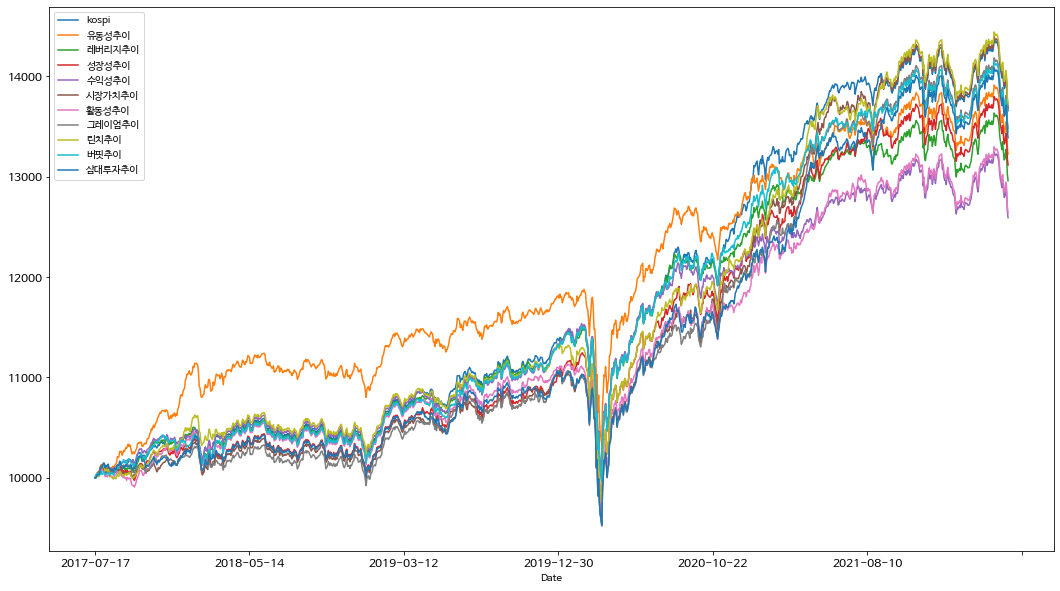

In [503]:
log_df[['kospi', '유동성추이', '레버리지추이', '성장성추이',
       '수익성추이', '시장가치추이', '활동성추이', '그레이엄추이', '린치추이', '버핏추이', '삼대투자추이']].plot(figsize=(18, 10), fontsize=12)

In [504]:
log_df.columns

Index(['Date', '단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그',
       '상승', '코스피', '유동성기법', '레버리지기법', '그레이엄기법', '린치기법', '버핏기법', '삼대투자기법',
       '성장성기법', '수익성기법', '시장가치기법', '활동성기법', '단기채w', '중기채w', 'kspw', 'iauw',
       'dbcw', 'vnqw', 'nsdw', '금액', 'kospi', '유동성추이', '레버리지추이', '성장성추이',
       '수익성추이', '시장가치추이', '활동성추이', '그레이엄추이', '린치추이', '버핏추이', '삼대투자추이'],
      dtype='object')

In [505]:
grp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 64 entries, 2017-06-19 to 2022-04-28
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lstm_markowitz  64 non-null     float64
 1   kospi           64 non-null     float64
 2   미래에셋            64 non-null     float64
 3   KB펀드            64 non-null     float64
dtypes: float64(4)
memory usage: 2.5 KB


In [506]:
log_df = log_df.drop('Date',axis=1)

In [507]:
log_df['Date']= log_df.index

,단기채로그,중기채로그,ksp로그,iau로그,dbc로그,vnq로그,nsd로그,상승,코스피,유동성기법,...,레버리지추이,성장성추이,수익성추이,시장가치추이,활동성추이,그레이엄추이,린치추이,버핏추이,삼대투자추이,Date
Date,,,,,,,,,,,,,,,,,,,,,
2017-07-17,0.000108,0.000027,0.004327,0.004225,-0.003447,0.008032,0.006033,0.0,2425.100098,0.013393,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,2017-07-17
2017-07-18,0.000048,0.000205,0.000388,0.007560,0.004135,-0.002152,0.002933,0.0,2426.040039,-0.002332,...,10009.918814,10002.095412,10009.558651,10002.748868,10000.503400,10014.570276,10003.328461,10007.408934,9999.196114,2017-07-18
2017-07-19,0.000027,0.000070,0.001606,-0.001675,0.008901,0.007511,0.001533,0.0,2429.939941,0.004864,...,10018.513986,10022.756147,10020.513125,10018.708765,10013.502599,10022.537013,10020.726043,10030.051891,10008.369104,2017-07-19
2017-07-20,0.000041,0.000339,0.004885,0.001675,-0.001364,-0.004643,0.002920,0.0,2441.840088,0.012835,...,10022.447623,10019.297709,10027.538575,10030.884766,10015.180575,10034.503093,10016.525826,10032.192732,10023.403952,2017-07-20
2017-07-21,0.000039,0.000426,0.003361,0.009163,-0.013746,-0.000716,0.009947,0.0,2450.060059,-0.003102,...,10019.226532,10017.380093,10026.742859,10042.282181,10015.834661,10036.250847,10011.479331,10026.220916,10024.553451,2017-07-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-03,0.000032,-0.000973,-0.002604,0.002823,-0.014052,0.012346,0.007312,0.0,2680.459961,-0.002604,...,12608.933780,12641.963028,12345.843092,13053.910922,12418.723599,12916.215741,13115.540492,12885.693653,12895.227265,2022-05-03
2022-05-04,0.000084,-0.000864,-0.001079,0.009819,0.030728,0.011425,0.014217,0.0,2677.570068,-0.001079,...,12683.510662,12716.735264,12418.863896,13131.119668,12492.175462,12992.610074,13193.113753,12961.907460,12971.497459,2022-05-04
2022-05-06,0.000109,0.001001,-0.012424,0.001961,0.001061,-0.011940,-0.016993,0.0,2644.510010,-0.012424,...,12654.018037,12687.165383,12389.986648,13100.586230,12463.127744,12962.398709,13162.436162,12931.767487,12941.335187,2022-05-06


In [508]:
from datetime import datetime
log_df['Date'] = log_df['Date'] .apply(lambda _: datetime.strptime(_,"%Y-%m-%d"))

In [509]:
log_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1183 entries, 2017-07-17 to 2022-05-10
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   단기채로그   1183 non-null   float64       
 1   중기채로그   1183 non-null   float64       
 2   ksp로그   1183 non-null   float64       
 3   iau로그   1183 non-null   float64       
 4   dbc로그   1183 non-null   float64       
 5   vnq로그   1183 non-null   float64       
 6   nsd로그   1183 non-null   float64       
 7   상승      1183 non-null   int64         
 8   코스피     1183 non-null   float64       
 9   유동성기법   1183 non-null   float64       
 10  레버리지기법  1183 non-null   float64       
 11  그레이엄기법  1183 non-null   float64       
 12  린치기법    1183 non-null   float64       
 13  버핏기법    1183 non-null   float64       
 14  삼대투자기법  1183 non-null   float64       
 15  성장성기법   1183 non-null   float64       
 16  수익성기법   1183 non-null   float64       
 17  시장가치기법  1183 non-null   float64       
 18

In [510]:
log_df.index = log_df['Date']

In [518]:
# log_df.to_csv('/content/gdrive/MyDrive/FINAL TEAM/파이널프로젝트/비주식팀/Data/비중DF/가격데이터/전체13가격데이터.csv',index=True)

In [512]:
# log_df

In [513]:
예측가격 = pd.merge(grp,log_df[['유동성추이', '레버리지추이', '그레이엄추이', '린치추이',
                            '버핏추이', '삼대투자추이', '성장성추이', '수익성추이', '시장가치추이', '활동성추이', 'kospi']],on='Date',how='outer').dropna()

In [514]:
예측가격

,lstm_markowitz,kospi_x,미래에셋,KB펀드,유동성추이,레버리지추이,그레이엄추이,린치추이,버핏추이,삼대투자추이,성장성추이,수익성추이,시장가치추이,활동성추이,kospi_y
Date,,,,,,,,,,,,,,,
2017-07-17,10001.515150,10228.606004,10238.834282,9963.854826,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
2017-08-14,10112.835344,9845.291100,9847.387481,9914.771839,10097.910196,10055.342418,10064.376994,10016.661370,10034.490721,10092.285629,10048.535166,10084.508130,10058.309877,10024.670016,10033.395591
2017-09-11,10251.476511,9950.146254,9912.916020,9885.849316,10282.184399,10074.399556,10108.515243,10036.856465,10146.829852,10111.901854,10054.686975,10162.078816,10039.647857,9993.855602,10117.496381
2017-11-06,10375.808303,10752.920904,10486.290740,9978.759134,10488.306645,10325.460643,10113.469626,10221.964451,10310.610422,10166.051732,10231.291819,10350.572673,10115.342473,10148.056823,10294.235631
2017-12-04,10508.183038,10551.562803,10490.601828,10134.366294,10671.580357,10399.939765,10210.976410,10340.720883,10401.921110,10198.129111,10302.999401,10429.277803,10183.807446,10320.284812,10331.575420
2018-01-03,10536.285505,10486.946729,10691.498534,10155.091224,10827.958922,10376.046402,10212.678448,10386.441015,10377.842432,10210.703861,10301.852203,10401.118162,10214.172439,10327.325881,10371.868013
2018-01-31,10637.622705,10824.834732,11128.642869,10319.264010,11134.153054,10444.793297,10307.606893,10609.086338,10390.763134,10403.303852,10375.757173,10455.816612,10331.595640,10407.197811,10469.408066
2018-02-28,10424.612395,10238.138291,10387.135713,10332.627706,10862.313408,10222.039830,10103.474846,10411.129238,10217.613772,10179.734983,10135.560407,10291.766126,10118.843177,10202.844812,10287.583620
2018-03-28,10501.358476,10204.100294,10280.220728,10311.578951,11012.442599,10367.120026,10110.025298,10432.159262,10322.927478,10208.737454,10208.146221,10404.634448,10182.326329,10314.088940,10381.076504


In [515]:
예측가격.columns.tolist()

['lstm_markowitz',
 'kospi_x',
 '미래에셋',
 'KB펀드',
 '유동성추이',
 '레버리지추이',
 '그레이엄추이',
 '린치추이',
 '버핏추이',
 '삼대투자추이',
 '성장성추이',
 '수익성추이',
 '시장가치추이',
 '활동성추이',
 'kospi_y']

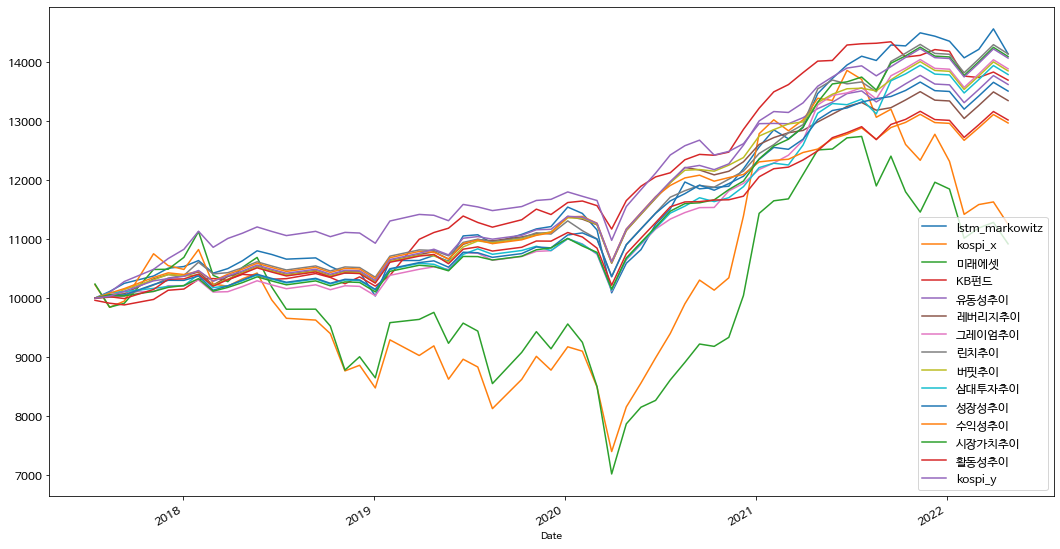

In [516]:
p = 예측가격[['lstm_markowitz',
 'kospi_x',
 '미래에셋',
 'KB펀드',
 '유동성추이',
 '레버리지추이',
 '그레이엄추이',
 '린치추이',
 '버핏추이',
 '삼대투자추이',
 '성장성추이',
 '수익성추이',
 '시장가치추이',
 '활동성추이',
 'kospi_y']].plot(figsize=(18, 10), fontsize=12)
p.legend(fontsize=12)
# plt.savefig("/content/gdrive/My Drive/FINAL TEAM/파이널프로젝트/비주식팀/Data/차트/기간"+str(perf_df.index[1])[:10]+"-"+str(perf_df.index[-1])[:10]+"감마"+str(GAMMA_CONST)+"REG"+str(REG_CONST)+"가중치.png")
plt.show()

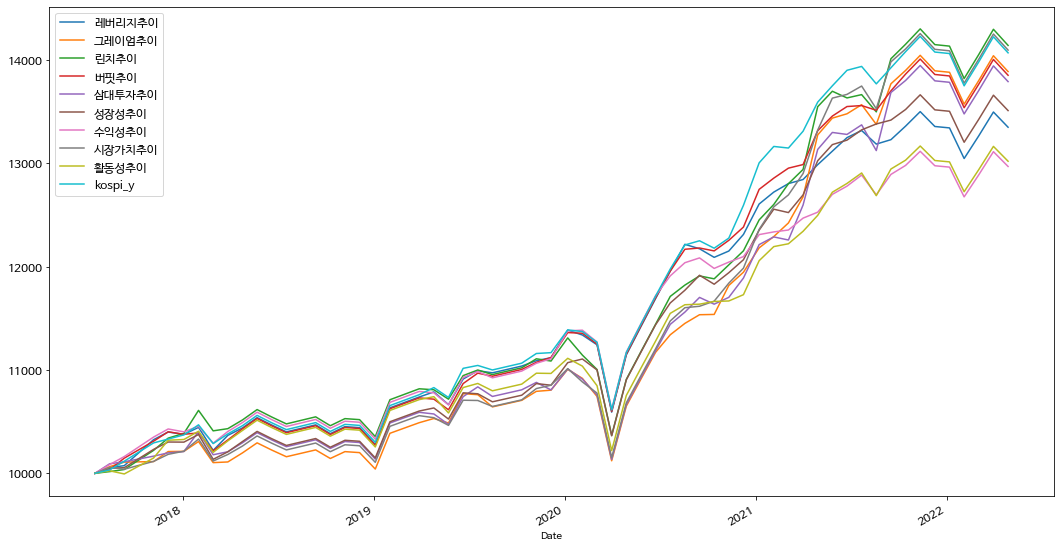

In [517]:
p = 예측가격[[ 
 '레버리지추이',
 '그레이엄추이',
 '린치추이',
 '버핏추이',
 '삼대투자추이',
 '성장성추이',
 '수익성추이',
 '시장가치추이',
 '활동성추이',
 'kospi_y']].plot(figsize=(18, 10), fontsize=12)
p.legend(fontsize=12)
# plt.savefig("/content/gdrive/My Drive/FINAL TEAM/파이널프로젝트/비주식팀/Data/차트/기간"+str(perf_df.index[1])[:10]+"-"+str(perf_df.index[-1])[:10]+"감마"+str(GAMMA_CONST)+"REG"+str(REG_CONST)+"가중치.png")
plt.show()

In [ ]:
asdfasdfasdfasdfasdfasdfasdfasd

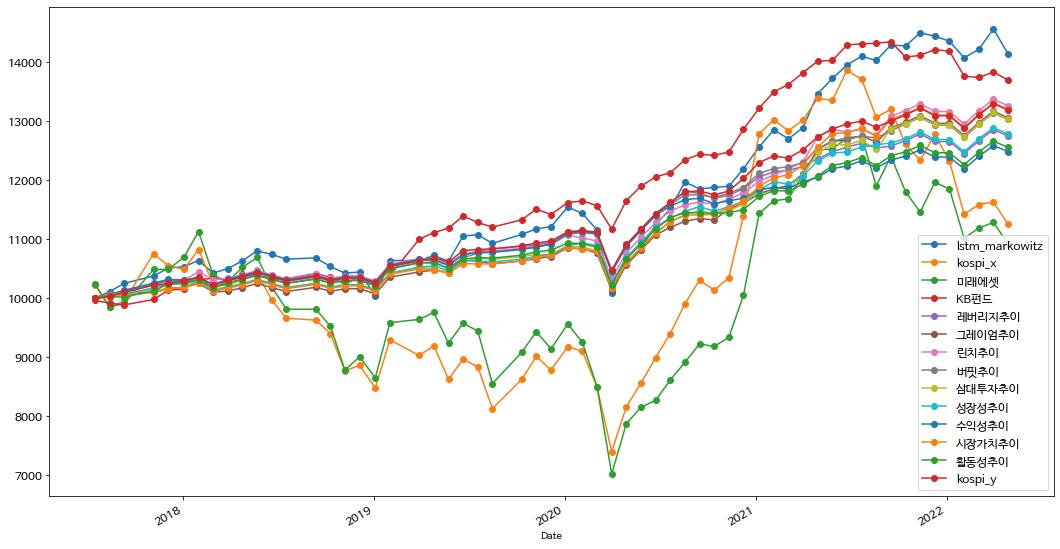

In [316]:
p = 예측가격[['lstm_markowitz',
 'kospi_x',
 '미래에셋',
 'KB펀드',
 
 '레버리지추이',
 '그레이엄추이',
 '린치추이',
 '버핏추이',
 '삼대투자추이',
 '성장성추이',
 '수익성추이',
 '시장가치추이',
 '활동성추이',
 'kospi_y']].plot(figsize=(18, 10), style = '-o', fontsize=12)
p.legend(fontsize=12)
# plt.savefig("/content/gdrive/My Drive/FINAL TEAM/파이널프로젝트/비주식팀/Data/차트/기간"+str(perf_df.index[1])[:10]+"-"+str(perf_df.index[-1])[:10]+"감마"+str(GAMMA_CONST)+"REG"+str(REG_CONST)+"가중치.png")
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49483 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_

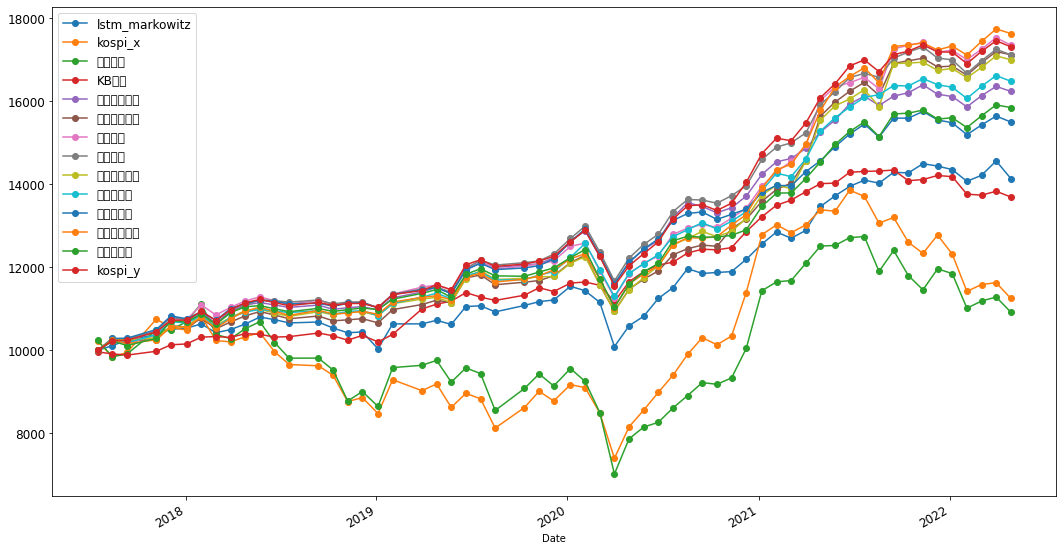

In [313]:
p = 예측가격[['lstm_markowitz',
 'kospi_x',
 '미래에셋',
 'KB펀드',
 
 '레버리지추이',
 '그레이엄추이',
 '린치추이',
 '버핏추이',
 '삼대투자추이',
 '성장성추이',
 '수익성추이',
 '시장가치추이',
 '활동성추이',
 'kospi_y']].plot(figsize=(18, 10), style = '-o', fontsize=12)
p.legend(fontsize=12)
# plt.savefig("/content/gdrive/My Drive/FINAL TEAM/파이널프로젝트/비주식팀/Data/차트/기간"+str(perf_df.index[1])[:10]+"-"+str(perf_df.index[-1])[:10]+"감마"+str(GAMMA_CONST)+"REG"+str(REG_CONST)+"가중치.png")
plt.show()

In [210]:
예측가격.plot()

,lstm_markowitz,kospi_x,미래에셋,KB펀드,유동성추이,레버리지추이,그레이엄추이,린치추이,버핏추이,삼대투자추이,성장성추이,수익성추이,시장가치추이,활동성추이,kospi_y
Date,,,,,,,,,,,,,,,
2017-07-17,10001.515150,10228.606004,10238.834282,9963.854826,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
2017-08-14,10112.835344,9845.291100,9847.387481,9914.771839,10304.917470,10247.840673,10259.869052,10195.525107,10219.837026,10297.411150,10238.755162,10286.939123,10251.632221,10206.705955,10218.092649
2017-09-11,10251.476511,9950.146254,9912.916020,9885.849316,10442.148866,10164.650589,10209.860652,10114.071701,10261.228096,10214.105561,10138.468043,10281.495330,10117.843294,10057.500748,10221.730564
2017-11-06,10375.808303,10752.920904,10486.290740,9978.759134,10713.389180,10494.913863,10210.946652,10355.813638,10474.332215,10280.858437,10369.023725,10528.400616,10213.638688,10257.674546,10452.357128
2017-12-04,10508.183038,10551.562803,10490.601828,10134.366294,11221.812465,10847.195789,10587.414166,10765.334550,10849.114953,10569.865299,10714.268446,10887.452884,10550.773492,10737.563979,10752.569368
2018-01-03,10536.285505,10486.946729,10691.498534,10155.091224,11362.571533,10741.554312,10518.681182,10755.596141,10742.887531,10516.233820,10640.662742,10775.704578,10521.537865,10674.844273,10735.355552
2018-01-31,10637.622705,10824.834732,11128.642869,10319.264010,11877.036950,10917.237841,10728.503311,11143.782543,10841.817780,10859.868369,10822.690019,10932.389124,10761.740994,10865.347971,10950.905378
2018-02-28,10424.612395,10238.138291,10387.135713,10332.627706,11460.913913,10579.729951,10418.730056,10837.557414,10572.957834,10521.267027,10462.110785,10674.821540,10439.218200,10553.405408,10668.822799
2018-03-28,10501.358476,10204.100294,10280.220728,10311.578951,11834.540502,10930.658365,10575.489414,11020.474504,10868.076666,10710.512308,10710.526833,10982.739492,10674.809329,10856.604247,10949.753646


In [390]:
예측가격.describe()

,lstm_markowitz,kospi_x,미래에셋,KB펀드,유동성추이,레버리지추이,그레이엄추이,린치추이,버핏추이,삼대투자추이,성장성추이,수익성추이,시장가치추이,활동성추이,kospi_y
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,11776.148543,10451.411694,10186.692036,11918.944189,11706.377940,11383.369844,11272.770195,11494.287546,11438.695522,11298.224430,11258.400664,11270.980581,11345.118412,11197.878570,11542.689353
std,1498.655882,1706.866923,1349.083306,1539.881120,972.530627,1049.486872,1225.341720,1241.800405,1169.363736,1184.400192,1088.460852,898.280204,1287.245863,956.550275,1248.787205
min,10001.515150,7400.734265,7021.038110,9885.849316,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
25%,10629.768738,9021.679697,9229.177444,10373.031124,10889.254228,10381.103381,10179.906928,10432.808457,10346.092988,10255.243621,10263.456699,10410.839496,10234.078657,10329.634263,10392.142043
50%,11156.453047,10204.100294,9912.916020,11567.898898,11362.748452,11033.894849,10679.727194,10921.358056,11006.949828,10731.067806,10786.416925,11026.046120,10712.707352,10806.597110,11046.990183
75%,12871.559643,11608.946407,11236.851181,13657.499154,12606.848845,12448.795358,12234.232255,12526.198957,12526.005309,12201.246220,12240.925996,12100.490389,12439.843629,12062.439139,12771.493737
max,14564.023824,13860.138483,12740.989826,14345.142635,13289.281247,13072.414268,13488.860267,13730.774527,13424.381187,13459.243092,13129.788871,12742.423818,13664.185380,12851.869706,13624.759234


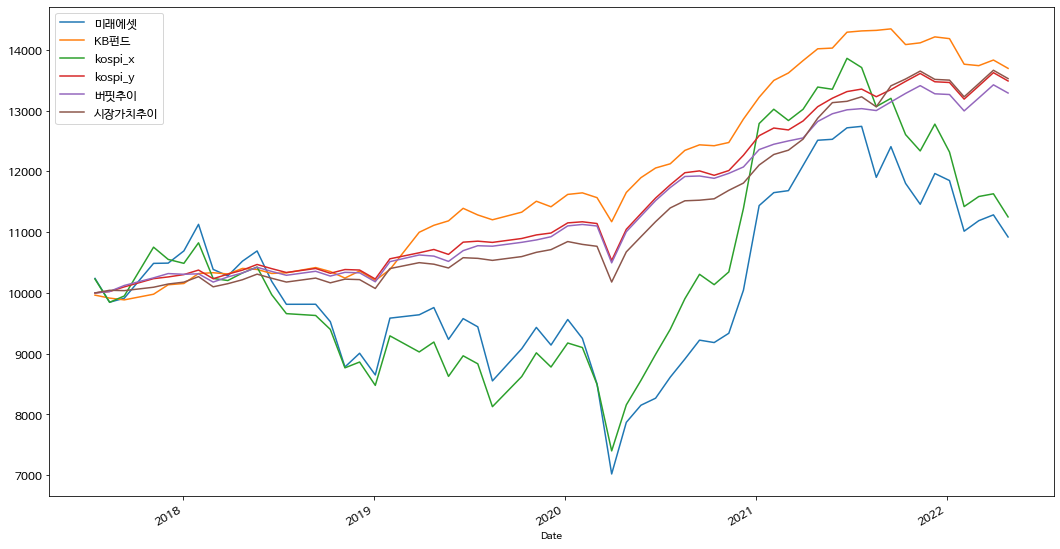

In [391]:
p = 예측가격[['미래에셋', 'KB펀드','kospi_x' ,'kospi_y','버핏추이','시장가치추이']].plot(figsize=(18, 10), fontsize=12)
p.legend(fontsize=12)
# plt.savefig("/content/gdrive/My Drive/FINAL TEAM/파이널프로젝트/비주식팀/Data/차트/기간"+str(perf_df.index[1])[:10]+"-"+str(perf_df.index[-1])[:10]+"감마"+str(GAMMA_CONST)+"REG"+str(REG_CONST)+"가중치.png")
plt.show()

In [ ]:
누적수익률= (1+test).cumprod()-1 

In [230]:
test = log_df.copy()
test

,Date,단기채로그,중기채로그,ksp로그,iau로그,dbc로그,vnq로그,nsd로그,상승,코스피,...,유동성추이,레버리지추이,성장성추이,수익성추이,시장가치추이,활동성추이,그레이엄추이,린치추이,버핏추이,삼대투자추이
Date,,,,,,,,,,,,,,,,,,,,,
2017-07-17,2017-07-17,0.000108,0.000027,0.004327,0.004225,-0.003447,0.008032,0.006033,0.0,2425.100098,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
2017-07-18,2017-07-18,0.000048,0.000205,0.000388,0.007560,0.004135,-0.002152,0.002933,0.0,2426.040039,...,10012.423745,10020.358923,10005.083668,10019.655702,10006.359546,10001.975251,10029.440939,10007.491205,10015.458361,9999.422764
2017-07-19,2017-07-19,0.000027,0.000070,0.001606,-0.001675,0.008901,0.007511,0.001533,0.0,2429.939941,...,10043.617757,10037.546042,10045.822853,10041.453422,10037.919553,10027.746790,10045.406979,10041.861236,10060.091762,10017.720170
2017-07-20,2017-07-20,0.000041,0.000339,0.004885,0.001675,-0.001364,-0.004643,0.002920,0.0,2441.840088,...,10076.456081,10049.318642,10043.135598,10059.278475,10065.816584,10035.101283,10072.904907,10037.722286,10068.371002,10051.172759
2017-07-21,2017-07-21,0.000039,0.000426,0.003361,0.009163,-0.013746,-0.000716,0.009947,0.0,2450.060059,...,10104.790330,10073.557826,10069.908988,10088.295439,10118.743022,10066.882968,10106.947414,10058.358117,10087.272096,10083.974271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-03,2022-05-03,0.000032,-0.000973,-0.002604,0.002823,-0.014052,0.012346,0.007312,0.0,2680.459961,...,17028.195565,16690.055107,16798.334859,15967.495494,17758.506742,16262.666602,17241.825558,17670.035358,17529.484788,17151.753561
2022-05-04,2022-05-04,0.000084,-0.000864,-0.001079,0.009819,0.030728,0.011425,0.014217,0.0,2677.570068,...,17153.952609,16821.067340,16936.765912,16094.020111,17913.679884,16398.227997,17373.339240,17816.931807,17666.670541,17290.363480
2022-05-06,2022-05-06,0.000109,0.001001,-0.012424,0.001961,0.001061,-0.011940,-0.016993,0.0,2644.510010,...,17101.440941,16748.811045,16863.072341,16026.657633,17844.708778,16338.042912,17309.555983,17740.763194,17591.888681,17214.204553


In [221]:
test[0] = test[0]+1

In [227]:
test.columns

Index(['Date', '단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그',
       '상승', '코스피', '유동성기법', '레버리지기법', '그레이엄기법', '린치기법', '버핏기법', '삼대투자기법',
       '성장성기법', '수익성기법', '시장가치기법', '활동성기법', '단기채w', '중기채w', 'kspw', 'iauw',
       'dbcw', 'vnqw', 'nsdw', '금액', 'kospi', '유동성추이', '레버리지추이', '성장성추이',
       '수익성추이', '시장가치추이', '활동성추이', '그레이엄추이', '린치추이', '버핏추이', '삼대투자추이'],
      dtype='object')

In [231]:
test[['ksp로그','유동성기법', '레버리지기법', '그레이엄기법', '린치기법', '버핏기법', '삼대투자기법',
       '성장성기법', '수익성기법', '시장가치기법', '활동성기법']]

,ksp로그,유동성기법,레버리지기법,그레이엄기법,린치기법,버핏기법,삼대투자기법,성장성기법,수익성기법,시장가치기법,활동성기법
Date,,,,,,,,,,,
2017-07-17,0.004327,0.013393,0.011354,0.003543,0.007615,0.002298,0.003641,0.001646,0.008741,0.004245,0.004319
2017-07-18,0.000388,-0.002332,0.001328,0.005500,-0.004614,-0.000931,-0.008357,-0.005729,0.001004,-0.005138,-0.007171
2017-07-19,0.001606,0.004864,-0.001580,-0.002150,0.006325,0.010996,-0.001051,0.009241,0.000542,0.005040,0.002389
2017-07-20,0.004885,0.012835,0.003248,0.010410,-0.004061,0.001639,0.013152,-0.003392,0.006011,0.010601,0.001227
2017-07-21,0.003361,-0.003102,-0.004953,-0.000481,-0.006604,-0.007433,-0.001017,-0.003778,-0.002766,0.008145,-0.001462
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-03,-0.002604,0.002114,-0.006505,-0.008353,-0.003740,0.001091,-0.004454,-0.004513,-0.006798,-0.001810,-0.008891
2022-05-04,-0.001079,-0.009320,-0.003745,-0.006407,0.001788,-0.004029,-0.000976,0.000924,-0.002858,0.006830,0.002055
2022-05-06,-0.012424,0.001078,-0.013734,-0.006216,-0.013486,-0.012977,-0.015054,-0.014405,-0.012405,-0.008364,-0.006202


In [224]:
(1+test).cumprod()-1

Date
2017-07-17    1.004327
2017-07-18    1.005103
2017-07-19    1.008324
2017-07-20    1.018136
2017-07-21    1.024918
                ...   
2022-05-03    1.048918
2022-05-04    1.046708
2022-05-06    1.021280
2022-05-09    1.021280
2022-05-10    0.984294
Name: ksp로그, Length: 1183, dtype: float64